#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

##**Members**:
- **Md. Fahim Islam -> 2131059642**
- **Amit Chakraborty-> 2132692642**
- **Aditto Rahman   -> 2122332042**
- **Nahid Hassan    -> 2031269642**


- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***

# Imports

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Import

In [ ]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-2-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [ ]:
# Missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


#Droping Features



In [ ]:
df['EcNumber'].value_counts()


,count
EcNumber,
598,2
256,2
21582,2
246,2
247,2
...,...
13946,1
13949,1
13951,1


##EcNumber Correlation check

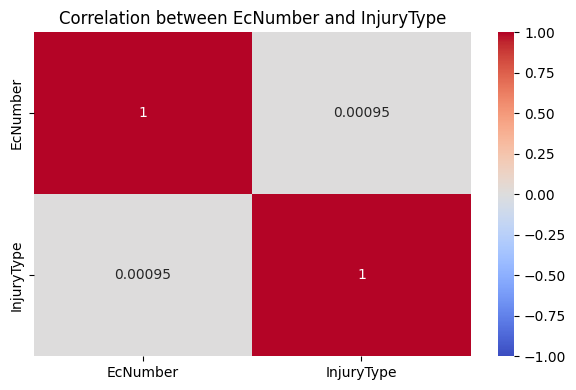

In [ ]:
df_sub = df[['EcNumber', 'InjuryType']].copy()
df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcNumber and InjuryType')
plt.tight_layout()
plt.show()


The value 0.00095 represents the correlation between EcNumber and InjuryType. A correlation of 0.00095 is extremely close to zero, meaning that there is no significant linear relationship between these two variables. That's why we deleted the EcNumber name region.

##HospitalName Correlation check

In [ ]:
df['HospitalName'].value_counts()

,count
HospitalName,
BBH,6953
DHQ,6099
PIMS,1663
"RHC,Mandra,Rawalpindi",1655
Wah General Hospital,1231
...,...
"THQ, Fateh Jang",1
"Nissa Nursing Home, Rawalpindi",1
"Nadeem Clinic, Rwp",1


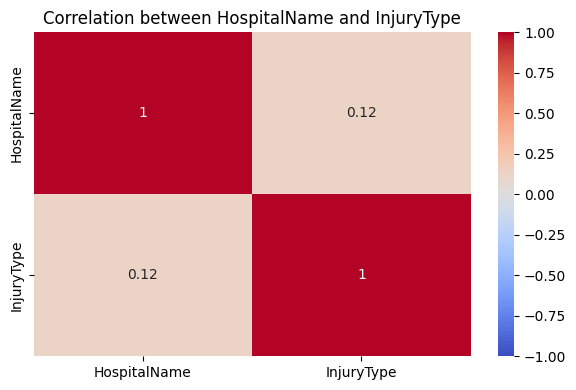

In [ ]:
df_sub = df[['HospitalName', 'InjuryType']].copy()
df_sub['HospitalName'] = df_sub['HospitalName'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between HospitalName and InjuryType')
plt.tight_layout()
plt.show()

The correlation between HospitalName and InjuryType is 0.12, which is a very weak positive correlation. This indicates that the two variables have a very minimal linear relationship, meaning the hospital where a patient was treated has little influence on the type of injury in the data.So we will remove this column

##CallTime Correlation check

In [ ]:
df['CallTime'].value_counts()

,count
CallTime,
1/3/21 10:07,3
9/30/20 13:35,3
12/3/20 19:58,2
10/13/20 8:36,2
9/24/22 21:07,2
...,...
8/29/21 13:23,1
8/29/21 13:07,1
8/29/21 13:04,1


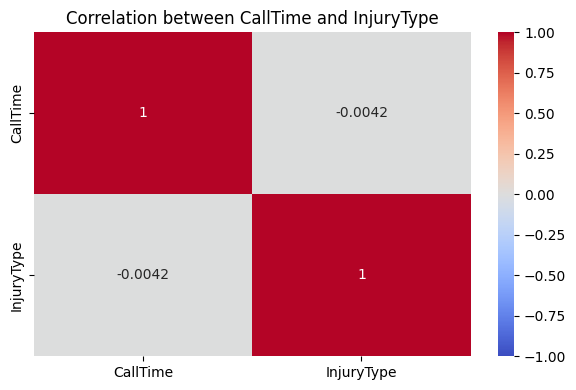

In [ ]:
df_sub = df[['CallTime', 'InjuryType']].copy()

df_sub['CallTime'] = df_sub['CallTime'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0042 shows a very weak negative correlation between "CallTime" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "CallTime" column.

##EcYear Correlation check

In [ ]:
df['EcYear'].value_counts()

,count
EcYear,
2021,12677
2020,11382
2023,9227
2022,8708
2022,4194
Hospital,1


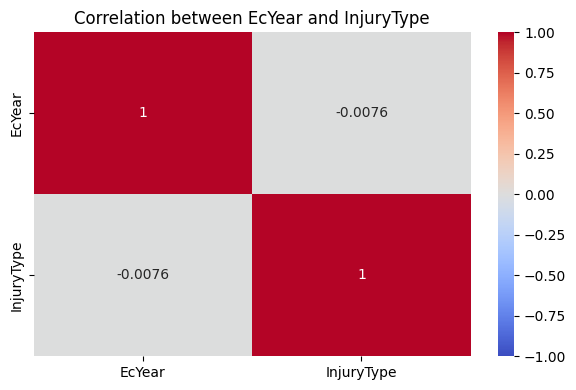

In [ ]:
df_sub = df[['EcYear', 'InjuryType']].copy()

df_sub['EcYear'] = df_sub['EcYear'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0076 shows a very weak negative correlation between "EcYear" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "EcYear" column.

##Info About Dropping

---



` EcNumber, HospitalName, EcYear and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



In [ ]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear', 'CallTime'], axis=1)

In [ ]:
df['PatientStatus'].value_counts()


,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46189 non-null  object 
 1   TotalPatientsInEmergency  46189 non-null  object 
 2   Gender                    46188 non-null  object 
 3   Age                       46188 non-null  float64
 4   Reason                    46188 non-null  object 
 5   responsetime              46184 non-null  float64
 6   EducationTitle            46188 non-null  object 
 7   InjuryType                46187 non-null  object 
 8   Cause                     46187 non-null  object 
 9   PatientStatus             46187 non-null  object 
 10  BicycleInvovled           46187 non-null  float64
 11  BikesInvolved             46187 non-null  float64
 12  BusesInvolved             46187 non-null  float64
 13  CarsInvolved              46187 non-null  float64
 14  CartIn

#Filling the Missing Values


In [ ]:
#missing values
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
PatientStatus,2


##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [ ]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender' ,'PatientStatus'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-16-a5da0e5dd916>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


#Duplicate Value

In [ ]:
df[df.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,Near sehal village chakri road Rwp,4,Male,42.0,same,8.0,Matric,Minor,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,Infront of ashraf marriage hall dhoke hafiz ...,3,Male,16.0,same,3.0,Matric,Minor,Over Speed,Alive & unstable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6037,Near flying Club Old airport road rwp,3,Male,18.0,Same,7.0,Primary,Minor,Over Speed,Alive & unstable,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,5,Male,17.0,same,7.0,Matric,Minor,Over Speed,Alive & unstable,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,4,Male,50.0,same,6.0,Primary,Minor,U Turn,Alive & unstable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",5,Female,45.0,Same,7.0,Middle,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,ranial near ranial choki chakri road rwp,4,Male,27.0,Same,8.0,Illetrate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",3,Male,18.0,Same,12.0,Primary,Minor,Carelessness,Alive & stable,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21791,Missa Kaswal GT Road Gujjar Khan Rwp,8,Male,30.0,same,10.0,Illetrate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
23862,AZAD PATTAN AZAD KASHMIR KAHUTA,5,Male,40.0,same,53.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.duplicated().sum()

28

##Handle Duplicate value

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
df.shape

(46161, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46161 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46161 non-null  object 
 1   TotalPatientsInEmergency  46161 non-null  object 
 2   Gender                    46161 non-null  object 
 3   Age                       46161 non-null  float64
 4   Reason                    46161 non-null  object 
 5   responsetime              46161 non-null  float64
 6   EducationTitle            46161 non-null  object 
 7   InjuryType                46161 non-null  object 
 8   Cause                     46161 non-null  object 
 9   PatientStatus             46161 non-null  object 
 10  BicycleInvovled           46161 non-null  float64
 11  BikesInvolved             46161 non-null  float64
 12  BusesInvolved             46161 non-null  float64
 13  CarsInvolved              46161 non-null  float64
 14  CartInvovle

#Encoding the categorical columns

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause


Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [ ]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


In [ ]:
# Delete the whole row where EducationTitle is 0
df = df[df['EducationTitle'] != '0']
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9


###Info EducationTitle Encoding

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EducationTitle Visualization Bar chart




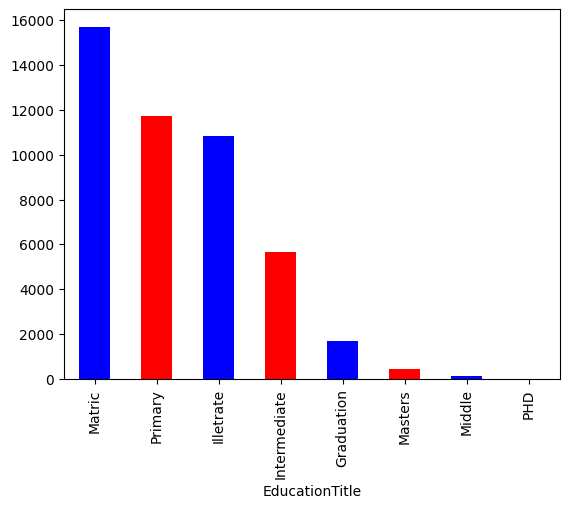

In [ ]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [ ]:

encoder=OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  object 
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  object 
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

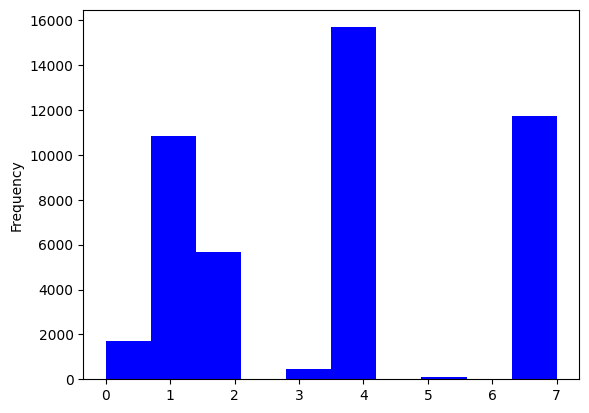

In [ ]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

The histogram shows the distribution of EducationTitle in a dataset. It reveals that most people have education title 5, with fewer people having higher titles and even fewer having lower titles. There are also a few outliers with very high education titles.








\

###EducationTitle Visualization Box plot

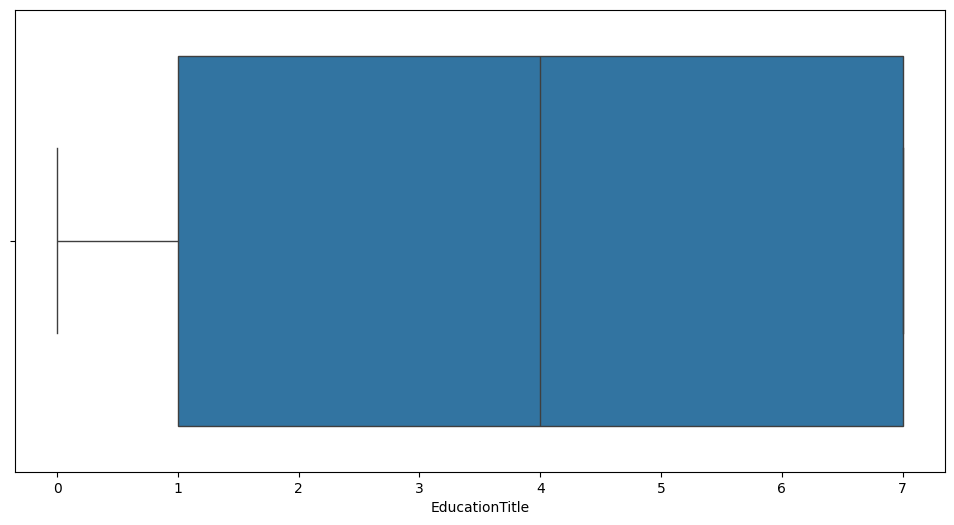

In [ ]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

The median education title is 5, indicating that 50% of the individuals have an education title less than or equal to 5.

The box plot shows a slight right skew, as the whisker on the right side is longer than the whisker on the left side. This indicates that there are a few individuals with higher education titles, but the majority of individuals have lower education titles.


In [ ]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34766
Single Fracture,6736
Head Injury,3499
Multiple Fractures,778
Spinal Injury,381


###Info InjuryType Encoding

```
We are using ordinal encoding for "InjuryType" because this method assigns numerical values to categories based on a meaningful order.
 In the case of injury severity, there is a natural hierarchy from minor to more serious conditions. For example:

1. Minor
2. Single Fracture
3. Head Injury
4. Multiple Fractures
5. Spinal Injury

By using ordinal encoding, you can capture this ordinal relationship, where higher numbers represent more severe injuries.
```



###InjuryType Visualization Bar Chart

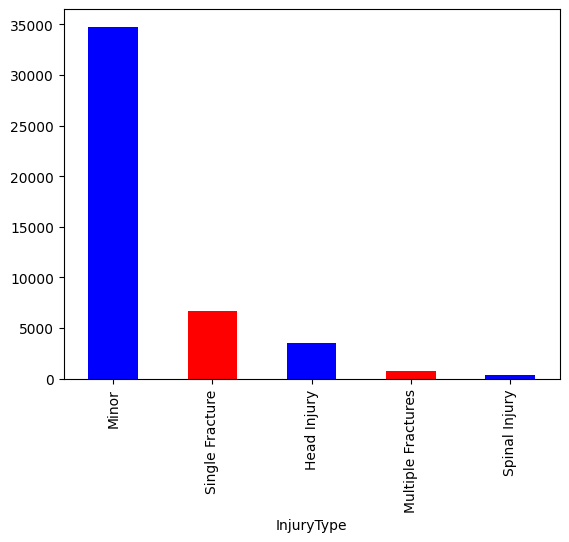

In [ ]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [ ]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType'] = ordinal_encoder.fit_transform(df[['InjuryType']])



In [ ]:
df['InjuryType'].value_counts()

,count
InjuryType,
0.0,34766
1.0,6736
4.0,3499
2.0,778
3.0,381


###InjuryType Visualization histogram


<ipython-input-32-4a235b854fad>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=injury_labels, order=injury_mapping.values(), palette=palette)


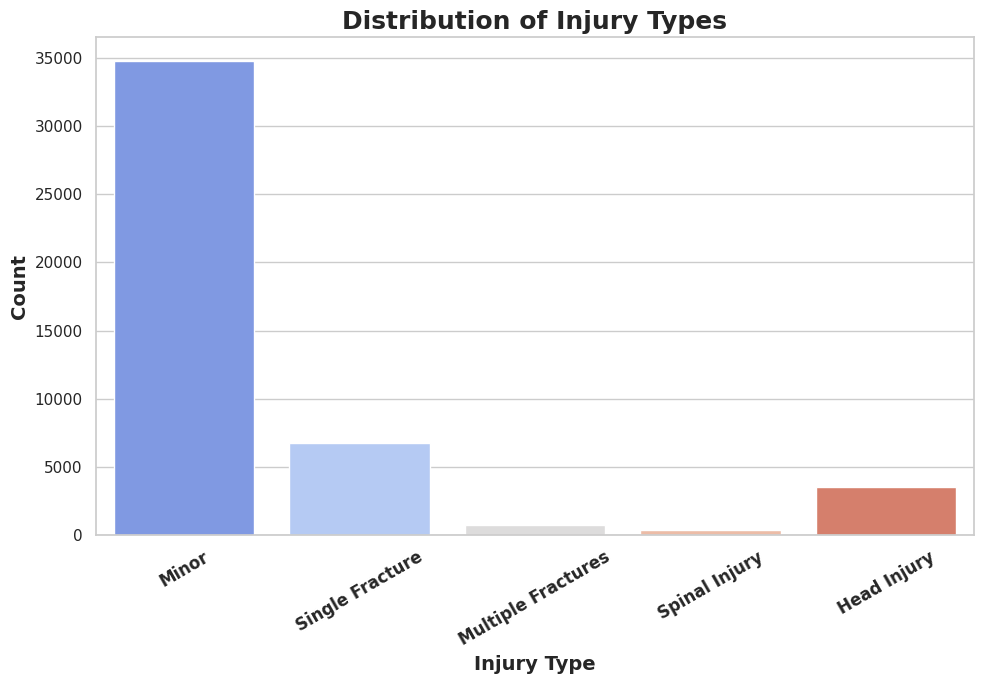

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map injury type codes to descriptive labels
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

# Convert encoded values to descriptive labels
encoded_values = df['InjuryType']
injury_labels = [injury_mapping[val] for val in encoded_values]

# Set up figure size and style
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")  # Use a clean grid style

# Use a modern color palette and sorted order
palette = sns.color_palette("coolwarm", len(injury_mapping))
sns.countplot(x=injury_labels, order=injury_mapping.values(), palette=palette)

# Add a title and axis labels with larger fonts and bold text
plt.title('Distribution of Injury Types', fontsize=18, weight='bold')
plt.xlabel('Injury Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23765
Alive & stable,21811
Dead,584


###Info Patient status Encoding

```
For the columns Patient status, we will apply Ordinal Encoding,
because these features have a strong inherent order
```

###InjuryType Visualization Bar Chart

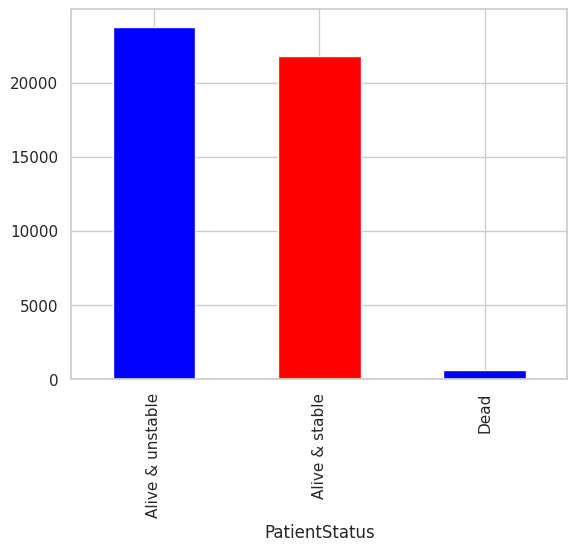

In [ ]:
df['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()


###PatientStatus Encoding


In [ ]:
# Define the categories for encoding
PatientStatus = [['Alive & unstable', 'Alive & stable', 'Dead']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=PatientStatus)

# Ensure the column is of type object or string
df['PatientStatus'] = df['PatientStatus']
# Apply the encoder to transform the column
df['PatientStatus'] = encoder.fit_transform(df[['PatientStatus']])

# Check the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['PatientStatus'].value_counts()


,count
PatientStatus,
0.0,23765
1.0,21811
2.0,584


<ipython-input-37-862bac0324eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


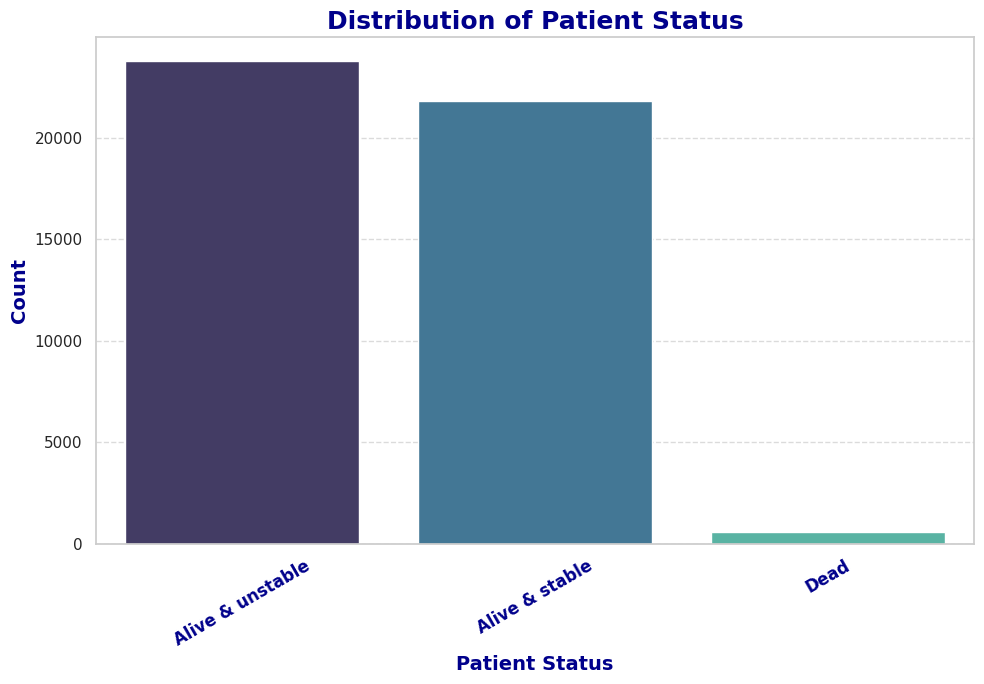

In [ ]:
# Ensure PatientStatus contains integers
encoded_values = df['PatientStatus']

# Map the encoded values back to descriptive labels
PatientStatus_mapping = {0: 'Alive & unstable', 1: 'Alive & stable', 2: 'Dead'}
PatientStatus_mapping_labels = [PatientStatus_mapping[val] for val in encoded_values]

# Prepare the plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("mako", len(PatientStatus_mapping))

# Plot the data using a count plot
sns.countplot(
    x=PatientStatus_mapping_labels,
    order=list(PatientStatus_mapping.values()),  # Ensure correct order
    palette=palette
)

# Add a title and labels with custom fonts
plt.title('Distribution of Patient Status', fontsize=18, weight='bold', color="darkblue")
plt.xlabel('Patient Status', fontsize=14, weight='bold', color="darkblue")
plt.ylabel('Count', fontsize=14, weight='bold', color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold', color="darkblue")

# Add grid lines for better data visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##Label Encoding

In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


###Info EmergencyArea Encoding

```
The EmergencyArea column contains numerous unique locations, with varying frequencies of incidents at each.
 Label encoding was applied to convert these categorical values into numerical labels for machine learning models.
  While label encoding simplifies the data for models, it doesn't capture the significance of frequent locations.
```



###EmergencyArea Encoding

In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


In [ ]:

encoder = LabelEncoder()
df['EmergencyArea'] = encoder.fit_transform(df['EmergencyArea'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  int64  
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
5352,42
1082,38
42,33
27523,31
16,29
...,...
8576,1
20180,1
8483,1


###EmergencyArea Visualization Box Plot

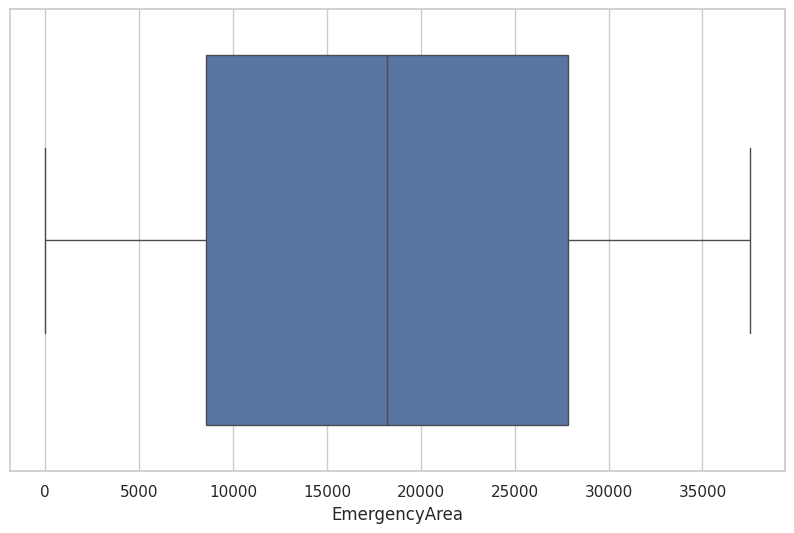

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()

 The median value, represented by the line inside the box, is approximately 20,000. This suggests that the middle 50% of the data
 points fall within the range of 10,000 to 25,000.

There are no visible outliers, as there are no data points outside of the whiskers.

###EmergencyArea Visualization Histogram

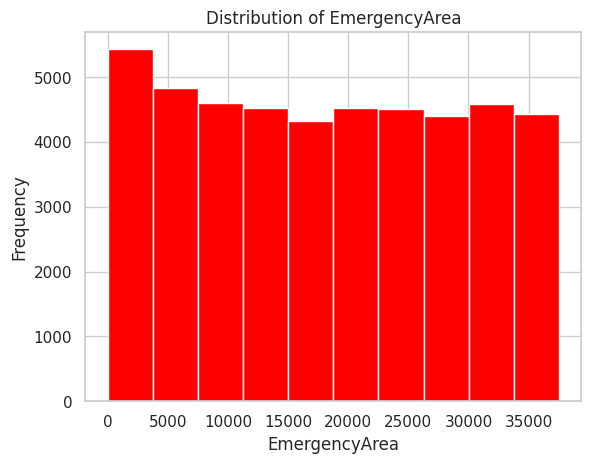

In [ ]:
df['EmergencyArea'].plot(kind='hist', color='red')
plt.title('Distribution of EmergencyArea')
plt.xlabel('EmergencyArea')
plt.ylabel('Frequency')
plt.show()


The histogram shows a relatively uniform distribution, with a consistent frequency across most of the "Emergency Area" values. There is no clear peak or skew in the data.

The range of "Emergency Area" values appears to be from approximately 0 to 35,000.

The frequency of each value seems to be around 4,000-5,000, with some minor variations.

In [ ]:
df['EmergencyArea']  = (df['EmergencyArea'] - df['EmergencyArea'].mean())/df['EmergencyArea'].max()

In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
-0.344538,42
-0.458347,38
-0.486067,33
0.246389,31
-0.486760,29
...,...
-0.258609,1
0.050675,1
-0.261087,1


###Info Cause Encoding




```
Label encoding is used for the Cause column to convert categorical values (e.g., "Over Speed," "Carelessness")
into numeric labels that machine learning models can process.
This is especially helpful for algorithms
like decision trees or random forests, which handle numerical data efficiently.
```



In [ ]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29569
Carelessness,14168
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


###Cause Visualization Bar chart




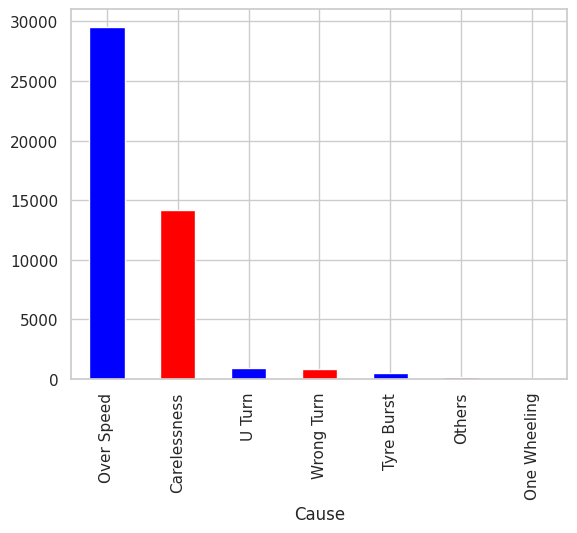

In [ ]:
df['Cause'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###Cause Label Encoding

In [ ]:
encoder = LabelEncoder()
df['Cause'] = encoder.fit_transform(df['Cause'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  float64
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  int64  
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['Cause'].value_counts()

,count
Cause,
3,29569
0,14168
5,933
6,841
4,481
2,104
1,64


###Cause Visualization Histogram


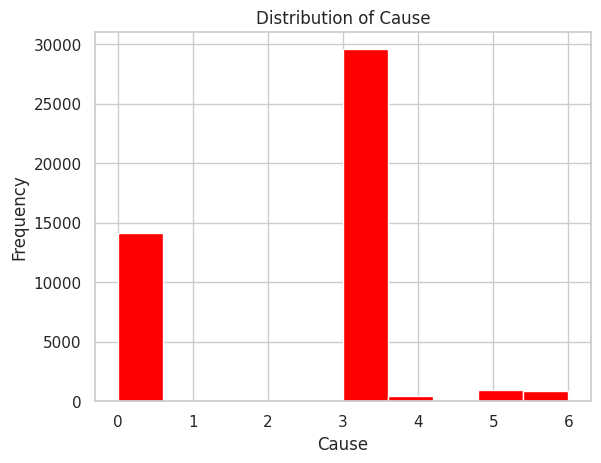

In [ ]:
df['Cause'].plot(kind='hist', color='red')
plt.title('Distribution of Cause')
plt.xlabel('Cause')
plt.show()


In [ ]:
df['Cause']  = (df['Cause'] - df['Cause'].mean())/df['Cause'].max()

In [ ]:
df['Cause'].value_counts()

,count
Cause,
0.136720,29569
-0.363280,14168
0.470053,933
0.636720,841
0.303387,481
-0.029947,104
-0.196613,64


In [ ]:
df['Reason'].value_counts()

,count
Reason,
same,2318
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1
Unknown van hit the bike (APF-22 US 70cc) and runaway,1


###Fill 'Same' data with forward fill

In [ ]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-54-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


###Reason Encoding

In [ ]:
encoder = LabelEncoder()
df['Reason'] = encoder.fit_transform(df['Reason'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  float64
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  int64  
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  float64
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['Reason'].value_counts()

,count
Reason,
11874,1330
11683,1039
14362,1018
22919,522
13087,409
...,...
3999,1
6454,1
15983,1


###Reason Visualization Box plot

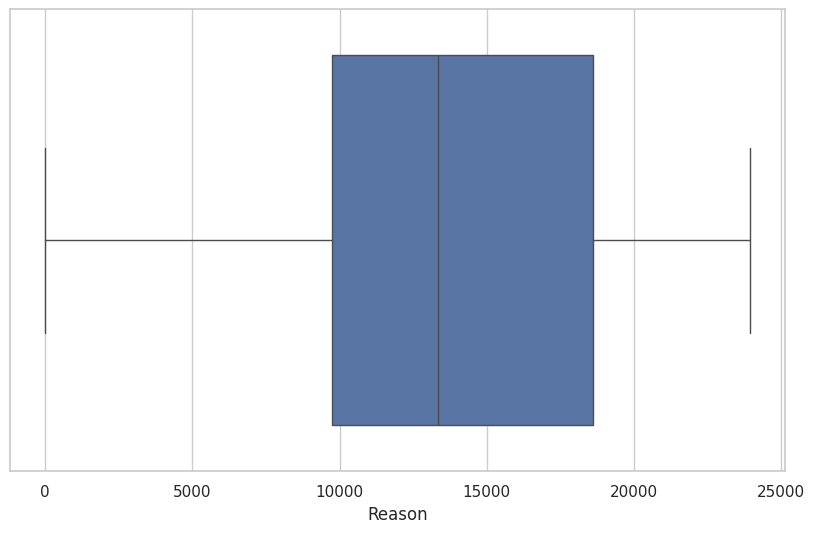

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Reason'])

plt.show()

 The median value, represented by the line inside the box, is approximately 15,000. This suggests that the middle 50% of the data points fall within the range of 10,000 to 20,000.

There are no visible outliers, as there are no data points outside of the whiskers.


###Reason Visualization Histogram


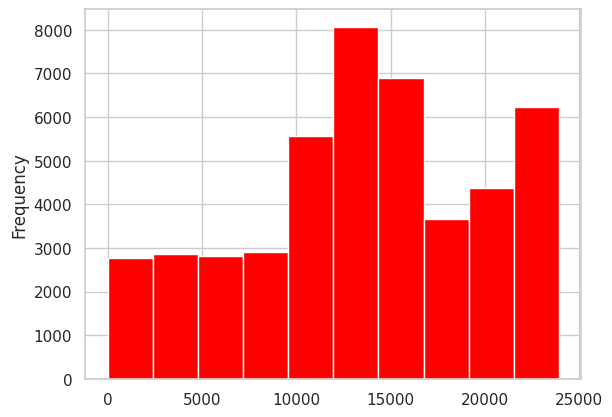

In [ ]:
df['Reason'].plot(kind='hist', color=[ 'red'])
plt.show()

The histogram shows a skewed distribution, with a peak around the values 10,000 to 15,000 and a longer tail extending towards higher values.

The range of values appears to be from approximately 0 to 25,000.


In [ ]:
df['Reason']  = (df['Reason'] - df['Reason'].mean())/df['Reason'].max()

In [ ]:
df['Reason'].value_counts()

,count
Reason,
-0.069770,1330
-0.077751,1039
0.034182,1018
0.391707,522
-0.019089,409
...,...
-0.398800,1
-0.296226,1
0.101910,1


##One Hot Encoding

###Info Gender Encoding

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



In [ ]:
df['Gender'].value_counts()



,count
Gender,
Male,39770
Female,6389
Other,1


In [ ]:
#print the '0' column whole row from gender
df[df['Gender'] == '0']



,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved


As the TotalPatientsInEmergency is not in perfect form same goes for Gender we can just delete this row

In [ ]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == '0'].index, inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,39770
Female,6389
Other,1


###Gender Visualization Pie chart


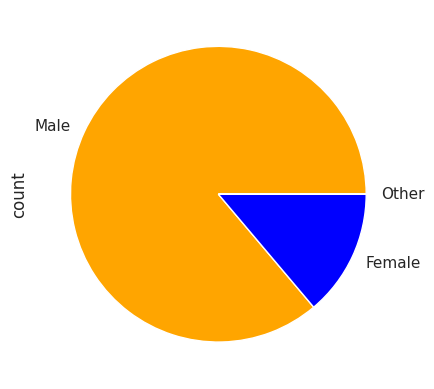

In [ ]:
df['Gender'].value_counts().plot(kind='pie', colors=['orange', 'blue','purple'])
plt.show()

###Gender Visualization Bar chart


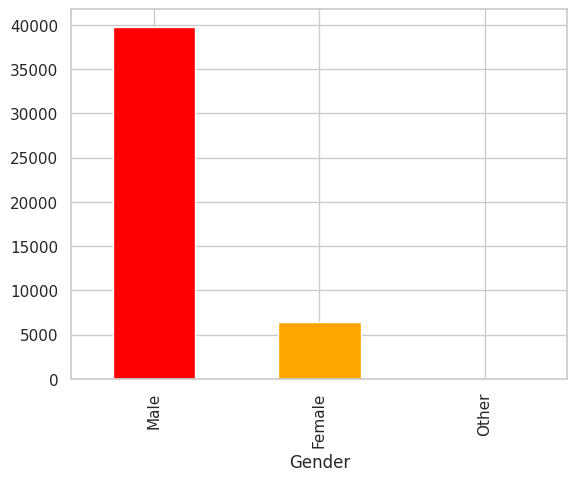

In [ ]:
df['Gender'].value_counts().plot(kind='bar', color=['red', 'orange','purple'])
plt.show()

###Gender One Hot Encode

In [ ]:
#convert gender into one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  float64
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Age                       46160 non-null  float64
 3   Reason                    46160 non-null  float64
 4   responsetime              46160 non-null  float64
 5   EducationTitle            46160 non-null  float64
 6   InjuryType                46160 non-null  float64
 7   Cause                     46160 non-null  float64
 8   PatientStatus             46160 non-null  float64
 9   BicycleInvovled           46160 non-null  float64
 10  BikesInvolved             46160 non-null  float64
 11  BusesInvolved             46160 non-null  float64
 12  CarsInvolved              46160 non-null  float64
 13  CartInvovled              46160 non-null  float64
 14  RickshawsIn

##Convert TotalPatientsInEmergency into numerical

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1119
3,448
4,361
5,185
4,117


In [ ]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  float64
 1   TotalPatientsInEmergency  46160 non-null  float64
 2   Age                       46160 non-null  float64
 3   Reason                    46160 non-null  float64
 4   responsetime              46160 non-null  float64
 5   EducationTitle            46160 non-null  float64
 6   InjuryType                46160 non-null  float64
 7   Cause                     46160 non-null  float64
 8   PatientStatus             46160 non-null  float64
 9   BicycleInvovled           46160 non-null  float64
 10  BikesInvolved             46160 non-null  float64
 11  BusesInvolved             46160 non-null  float64
 12  CarsInvolved              46160 non-null  float64
 13  CartInvovled              46160 non-null  float64
 14  RickshawsIn

In [ ]:
import pandas as pd
import numpy as np

df['TotalPatientsInEmergency'] = np.log1p(df['TotalPatientsInEmergency'])

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
0.693147,36151
1.098612,7313
1.386294,1567
1.609438,478
1.791759,255
1.945910,131
2.079442,98
2.197225,55
2.302585,45


###TotalPatientEmergency Visualization Histogram


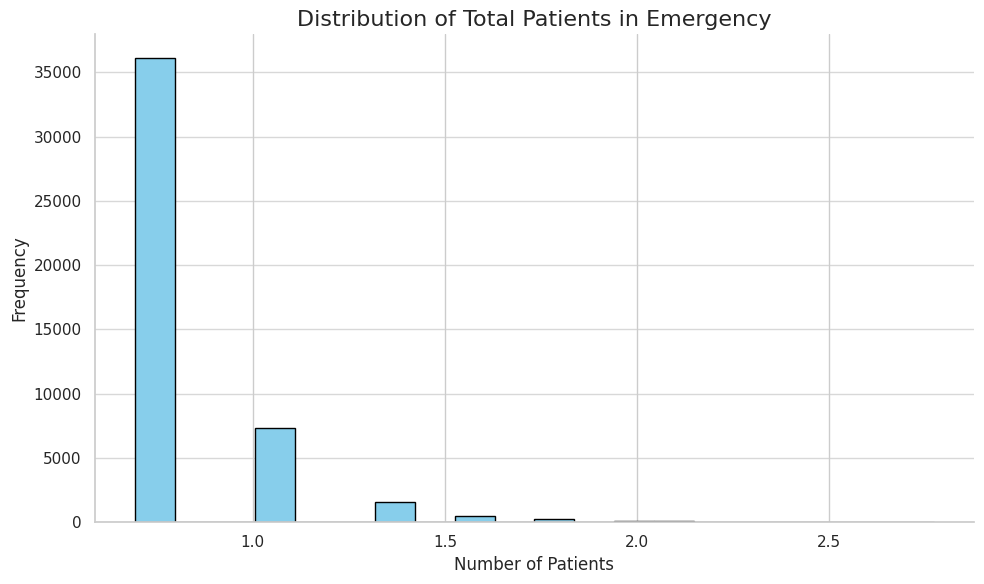

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPatientsInEmergency'], bins=20, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Distribution of Total Patients in Emergency', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Optional: Add grid and adjust spines
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

 The distribution is heavily skewed to the right, with a long tail extending towards higher numbers of patients. This indicates that there are a few instances with a very large number of patients, which significantly impacts the overall distribution.

#Assignment 2(Phase 2)



#For InjuryType

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p2, X_test_InjuryType_p2, y_train_InjuryType_p2, y_test_InjuryType_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)


##Model Train

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
y_pred_InjuryType_p2 = model.predict(X_test_InjuryType_p2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p2 = accuracy_score(y_test_InjuryType_p2, y_pred_InjuryType_p2)
precision_InjuryType_p2 = precision_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted', zero_division=0)
recall_InjuryType_p2 = recall_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')
f1_InjuryType_p2 = f1_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p2:.4f}")
print(f"Precision: {precision_InjuryType_p2:.4f}")
print(f"Recall: {recall_InjuryType_p2:.4f}")
print(f"F1 Score: {f1_InjuryType_p2:.4f}")

Accuracy: 0.7566
Precision: 0.6320
Recall: 0.7566
F1 Score: 0.6544


##confusion matrix plot

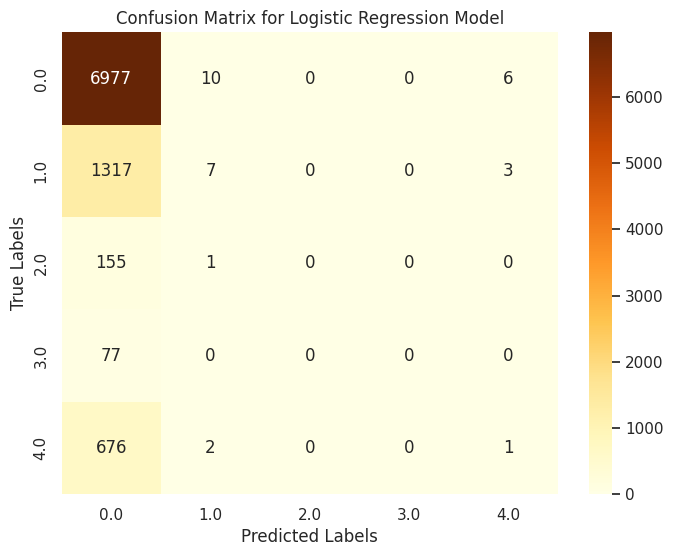

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p2, y_pred_InjuryType_p2)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-76-38542f7026c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


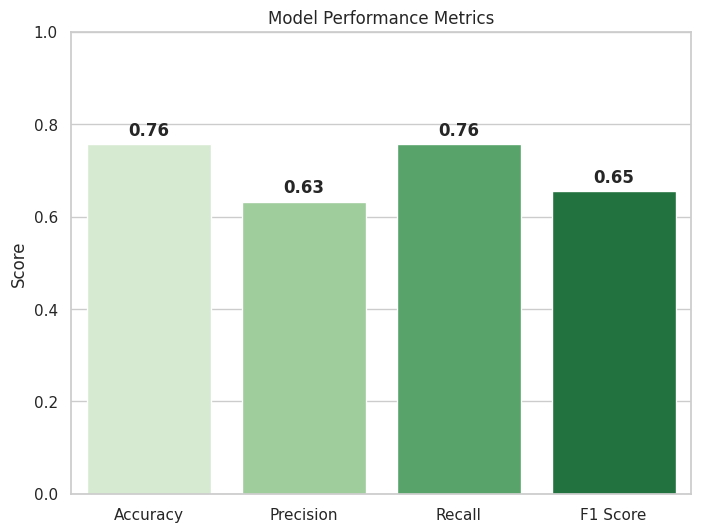

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p2, precision_InjuryType_p2, recall_InjuryType_p2, f1_InjuryType_p2]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Solver and Max_iter

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

solver_results = []
max_iter_results = []
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
    y_pred_solver = model_solver.predict(X_test_InjuryType_p2)

    # Calculate metrics
    accuracy_solver = accuracy_score(y_test_InjuryType_p2, y_pred_solver)


    solver_results.append((solver, accuracy_solver))

# Evaluate each max_iter
for max_iter in max_iters:
    model_max_iter = LogisticRegression(max_iter=max_iter)
    model_max_iter.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
    y_pred_max_iter = model_max_iter.predict(X_test_InjuryType_p2)

    # Calculate metrics
    accuracy_max_iter = accuracy_score(y_test_InjuryType_p2, y_pred_max_iter)


    max_iter_results.append((max_iter, accuracy_max_iter))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

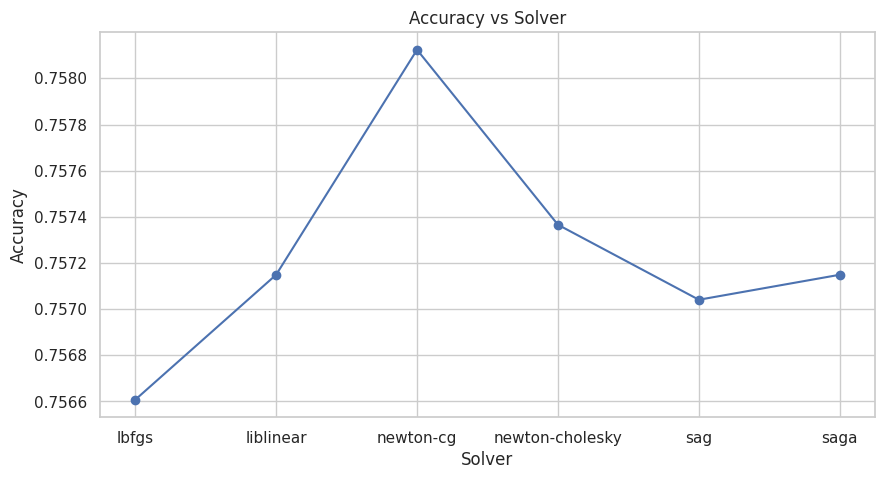

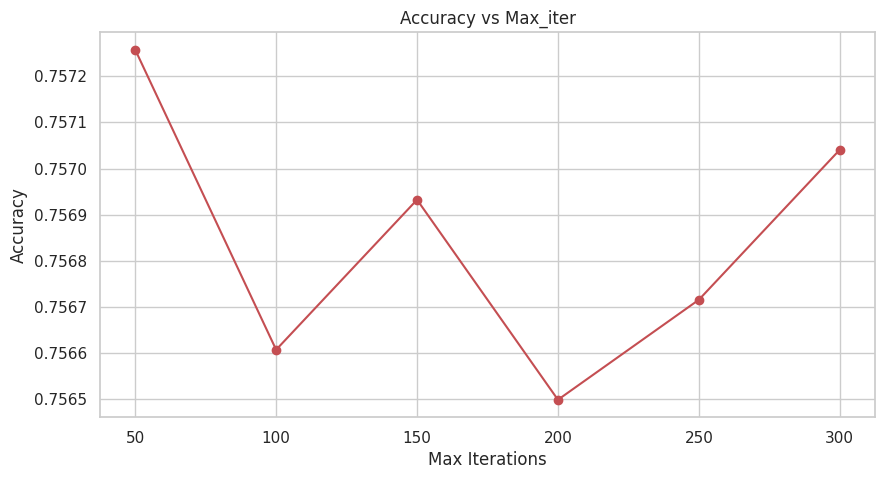

In [ ]:
solvers = [result[0] for result in solver_results]
solver_accuracies = [result[1] for result in solver_results]

max_iters = [result[0] for result in max_iter_results]
max_iter_accuracies = [result[1] for result in max_iter_results]

# Plot Accuracy vs Solver
plt.figure(figsize=(10, 5))
plt.plot(solvers, solver_accuracies, marker='o', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

# Plot Accuracy vs Max_iter
plt.figure(figsize=(10, 5))
plt.plot(max_iters, max_iter_accuracies, marker='o', color='r')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

#For PatientStatus

##Split Into Train and Test Sets for PatientStatus

In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p2, X_test_PatientStatus_p2, y_train_PatientStatus_p2, y_test_PatientStatus_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)

##Model Train

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
y_pred_PatientStatus_p2 = model.predict(X_test_PatientStatus_p2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p2 = accuracy_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2)
precision_PatientStatus_p2 = precision_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted', zero_division=0)
recall_PatientStatus_p2 = recall_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')
f1_PatientStatus_p2 = f1_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p2:.4f}")
print(f"Precision: {accuracy_PatientStatus_p2:.4f}")
print(f"Recall: {accuracy_PatientStatus_p2:.4f}")
print(f"F1 Score: {accuracy_PatientStatus_p2:.4f}")

Accuracy: 0.7288
Precision: 0.7288
Recall: 0.7288
F1 Score: 0.7288


##confusion matrix plot

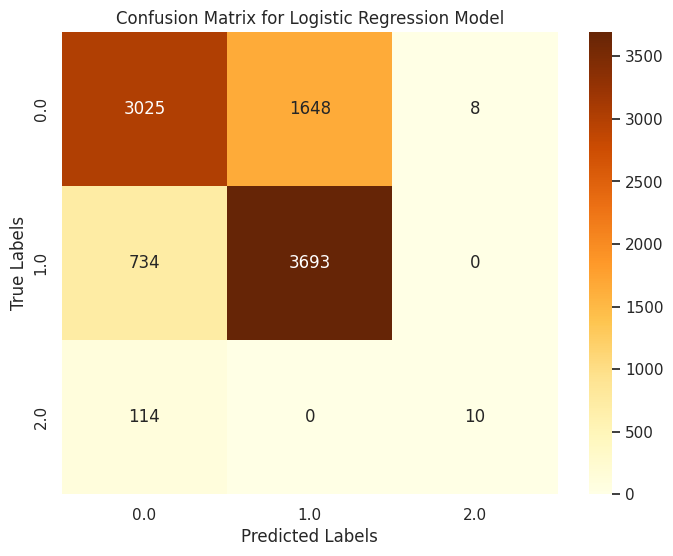

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p2, y_pred_PatientStatus_p2)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-83-9a16f702e42d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


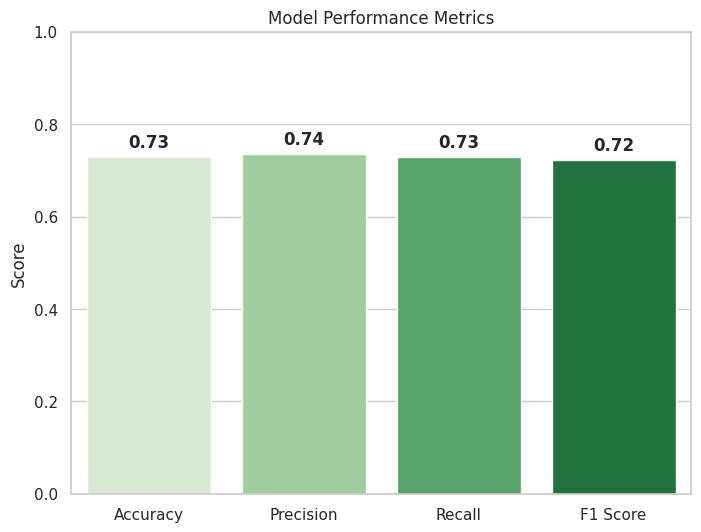

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p2, precision_PatientStatus_p2, recall_PatientStatus_p2, f1_PatientStatus_p2]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Solver and Max_iter

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

solver_results = []
max_iter_results = []
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
    y_pred_solver = model_solver.predict(X_test_PatientStatus_p2)

    # Calculate metrics
    accuracy_solver = accuracy_score(y_test_PatientStatus_p2, y_pred_solver)


    solver_results.append((solver, accuracy_solver))

# Evaluate each max_iter
for max_iter in max_iters:
    model_max_iter = LogisticRegression(max_iter=max_iter)
    model_max_iter.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
    y_pred_max_iter = model_max_iter.predict(X_test_PatientStatus_p2)

    # Calculate metrics
    accuracy_max_iter = accuracy_score(y_test_PatientStatus_p2, y_pred_max_iter)


    max_iter_results.append((max_iter, accuracy_max_iter))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

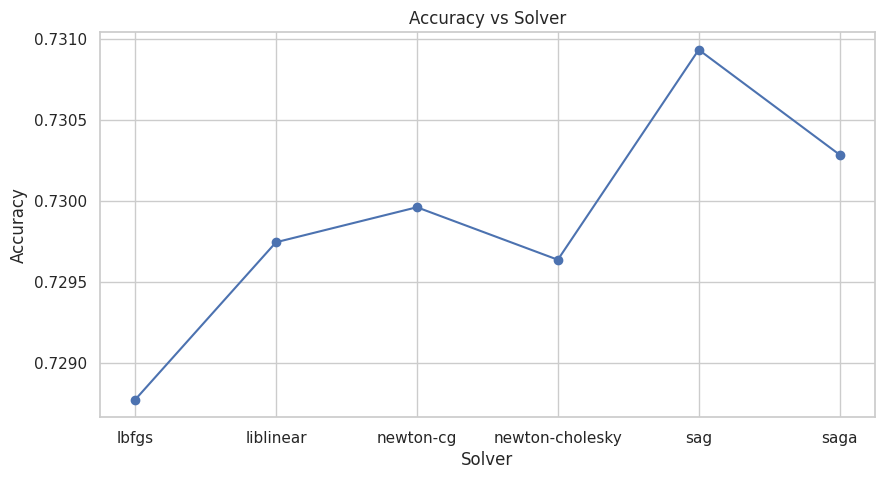

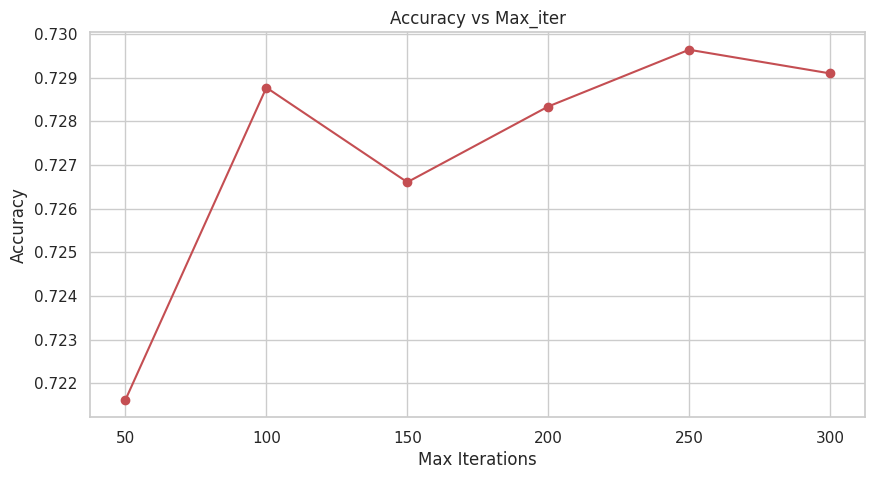

In [ ]:
solvers = [result[0] for result in solver_results]
solver_accuracies = [result[1] for result in solver_results]

max_iters = [result[0] for result in max_iter_results]
max_iter_accuracies = [result[1] for result in max_iter_results]

# Plot Accuracy vs Solver
plt.figure(figsize=(10, 5))
plt.plot(solvers, solver_accuracies, marker='o', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

# Plot Accuracy vs Max_iter
plt.figure(figsize=(10, 5))
plt.plot(max_iters, max_iter_accuracies, marker='o', color='r')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

# Assignment 3(Phase 3)


# For InjuryType

#Model Train using decision tree

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_dt, X_test_InjuryType_p3_dt, y_train_InjuryType_p3_dt, y_test_InjuryType_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer

# Train the train set on desicion tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_InjuryType_p3_dt, y_train_InjuryType_p3_dt)
y_pred_InjuryType_p3_dt = model.predict(X_test_InjuryType_p3_dt)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_dt = accuracy_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
precision_InjuryType_p3_dt = precision_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted', zero_division=0)
recall_InjuryType_p3_dt = recall_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')
f1_InjuryType_p3_dt = f1_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_dt:.4f}")
print(f"Precision: {precision_InjuryType_p3_dt:.4f}")
print(f"Recall: {recall_InjuryType_p3_dt:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_dt:.4f}")

Accuracy: 0.6684
Precision: 0.6776
Recall: 0.6684
F1 Score: 0.6729


##confusion matrix plot

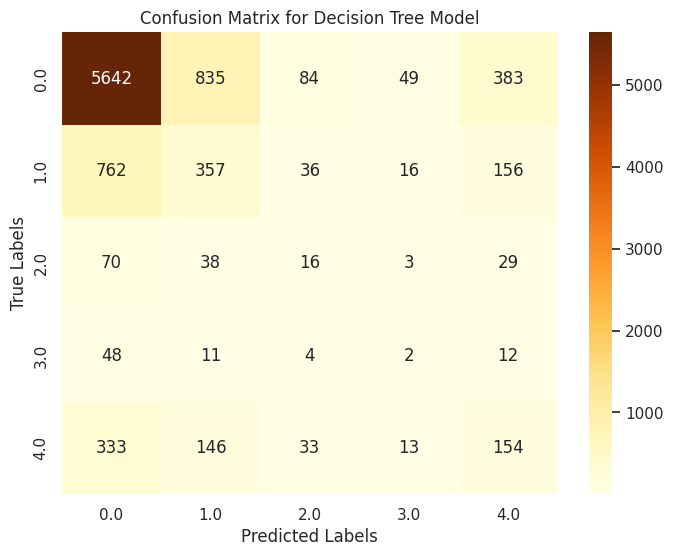

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-90-1c335c76aa81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


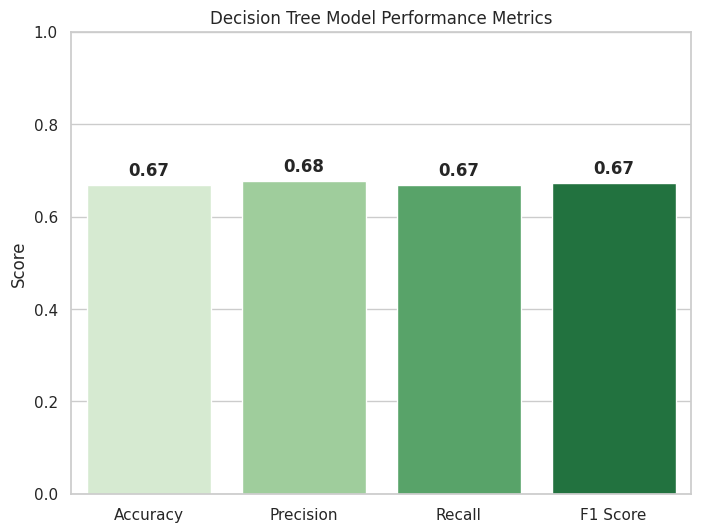

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_dt, precision_InjuryType_p3_dt, recall_InjuryType_p3_dt, f1_InjuryType_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Decision Tree Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Max_depth (x-axis)

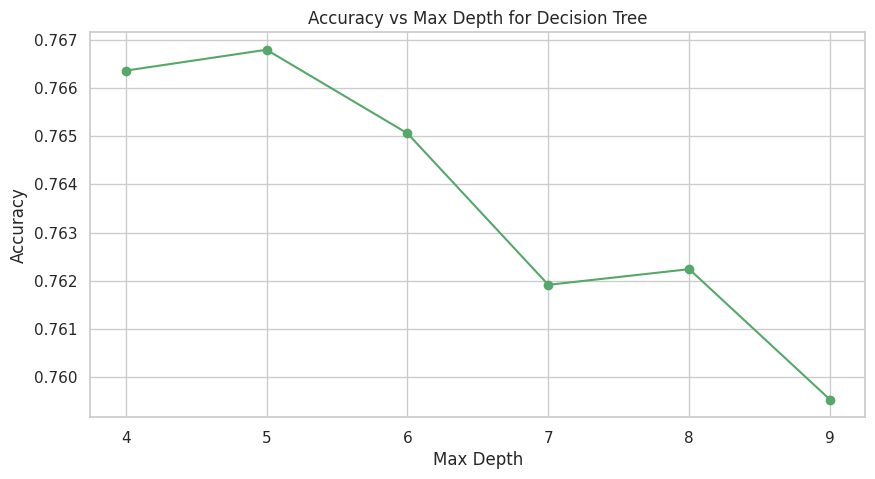

In [ ]:
# Splitting data
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

X_train_InjuryType_p3_dt, X_test_InjuryType_p3_dt, y_train_InjuryType_p3_dt, y_test_InjuryType_p3_dt = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define max_depth values
max_depths = [4, 5, 6, 7, 8, 9]

# Store results
max_depth_results = []

# Evaluate each max_depth
for max_depth in max_depths:
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train_InjuryType_p3_dt, y_train_InjuryType_p3_dt)
    y_pred_dt = model_dt.predict(X_test_InjuryType_p3_dt)

    # Calculate metrics
    accuracy_dt = accuracy_score(y_test_InjuryType_p3_dt, y_pred_dt)
    max_depth_results.append((max_depth, accuracy_dt))

# Extract max_depths and accuracies
max_depths = [result[0] for result in max_depth_results]
accuracies = [result[1] for result in max_depth_results]

# Plot Accuracy vs Max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o', color='g')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.grid(True)
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
# Model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_InjuryType_p3_svm = model.predict(X_test_InjuryType_p3_svm)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_svm = accuracy_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
precision_InjuryType_p3_svm = precision_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted', zero_division=0)
recall_InjuryType_p3_svm = recall_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')
f1_InjuryType_p3_svm = f1_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_svm:.4f}")
print(f"Precision: {precision_InjuryType_p3_svm:.4f}")
print(f"Recall: {recall_InjuryType_p3_svm:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_svm:.4f}")

Accuracy: 0.7575
Precision: 0.5738
Recall: 0.7575
F1 Score: 0.6529


##confusion matrix plot

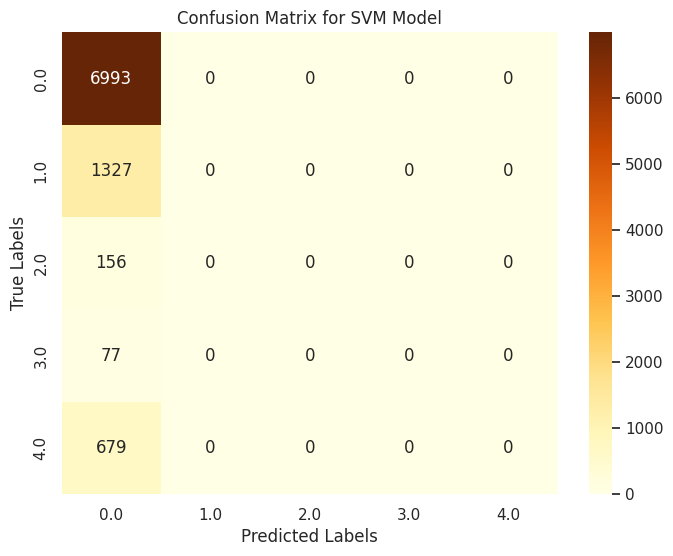

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-96-3fe757452813>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


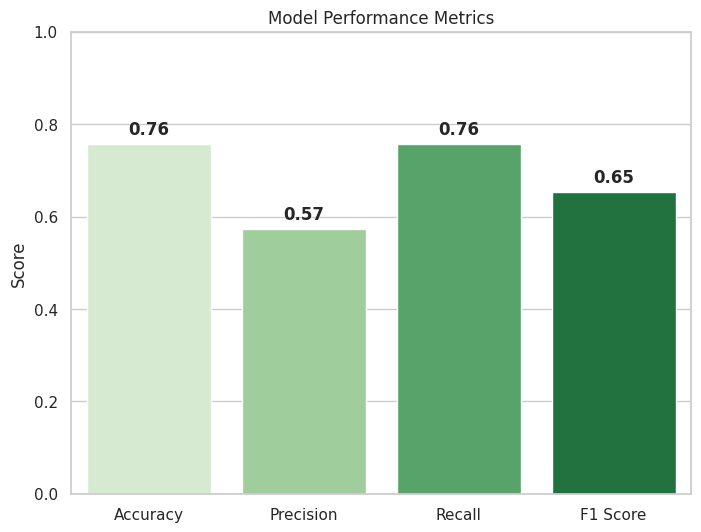

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_svm, precision_InjuryType_p3_svm, recall_InjuryType_p3_svm, f1_InjuryType_p3_svm]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Kernel (x-axis)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()



# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)



model_linear = SVC(kernel='linear')
model_linear.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_linear = model_linear.predict(X_test_InjuryType_p3_svm)
accuracy_linear = accuracy_score(y_test_InjuryType_p3_svm, y_pred_linear)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# Poly Kernel
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_poly = model_poly.predict(X_test_InjuryType_p3_svm)
accuracy_poly = accuracy_score(y_test_InjuryType_p3_svm, y_pred_poly)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# RBF Kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_rbf = model_rbf.predict(X_test_InjuryType_p3_svm)
accuracy_rbf = accuracy_score(y_test_InjuryType_p3_svm, y_pred_rbf)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_sigmoid = model_sigmoid.predict(X_test_InjuryType_p3_svm)
accuracy_sigmoid = accuracy_score(y_test_InjuryType_p3_svm, y_pred_sigmoid)



In [ ]:
# Results and Plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]



<ipython-input-102-2338ad6054e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")


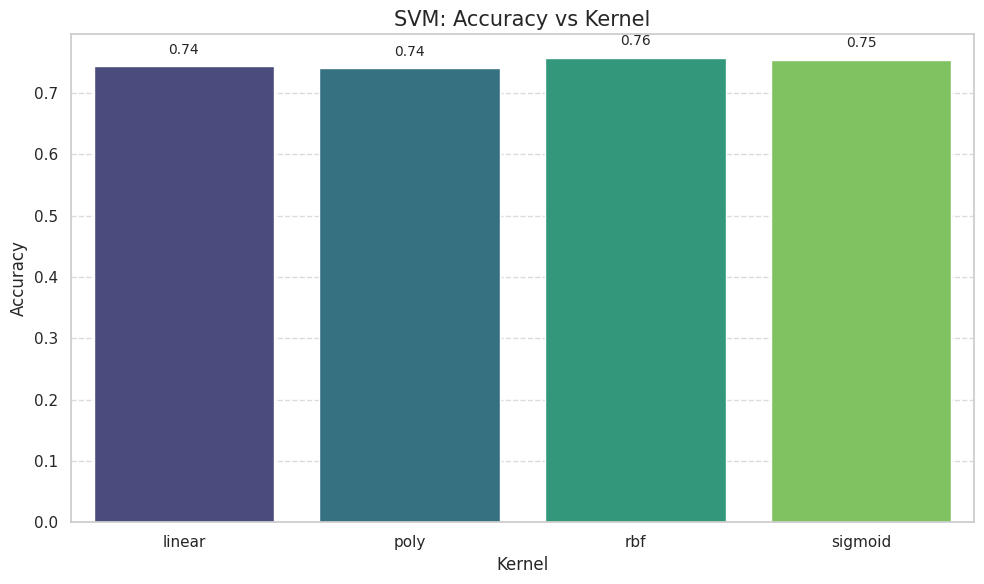

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")

# Adding labels and title
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('SVM: Accuracy vs Kernel', fontsize=15)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar plot with accuracy values
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# For PatientStatus

#Model Train using decision tree

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_dt, X_test_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt, y_test_PatientStatus_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model train

In [ ]:
# Model train using decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt)
y_pred_PatientStatus_p3_dt = model.predict(X_test_PatientStatus_p3_dt)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_dt = accuracy_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
precision_PatientStatus_p3_dt = precision_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted', zero_division=0)
recall_PatientStatus_p3_dt = recall_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')
f1_PatientStatus_p3_dt = f1_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_dt:.4f}")
print(f"Precision: {precision_PatientStatus_p3_dt:.4f}")
print(f"Recall: {recall_PatientStatus_p3_dt:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_dt:.4f}")

Accuracy: 0.6628
Precision: 0.6626
Recall: 0.6628
F1 Score: 0.6627


##confusion matrix plot

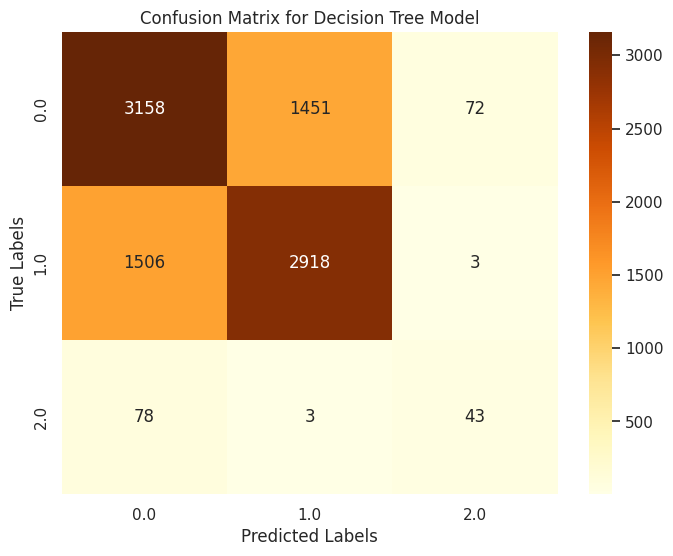

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-107-4e7a4c40d0ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


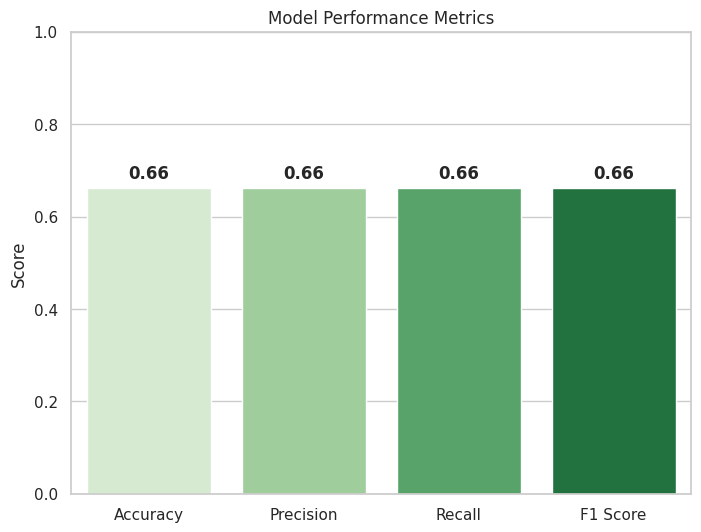

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_dt, precision_PatientStatus_p3_dt, recall_PatientStatus_p3_dt, f1_PatientStatus_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Max_depth (x-axis)

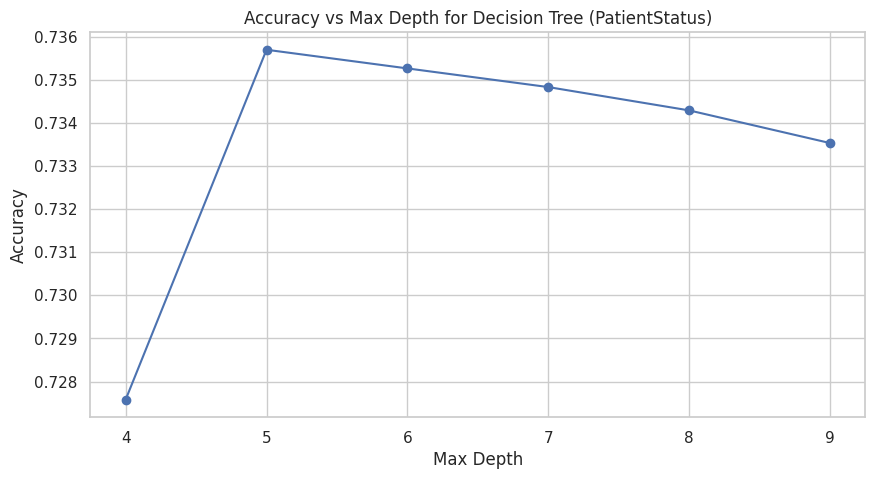

In [ ]:
# Splitting data
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

X_train_PatientStatus_p3_dt, X_test_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt, y_test_PatientStatus_p3_dt = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define max_depth values
max_depths = [4, 5, 6, 7, 8, 9]

# Store results
max_depth_results = []

# Evaluate each max_depth
for max_depth in max_depths:
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt)
    y_pred_dt = model_dt.predict(X_test_PatientStatus_p3_dt)

    # Calculate metrics
    accuracy_dt = accuracy_score(y_test_PatientStatus_p3_dt, y_pred_dt)
    max_depth_results.append((max_depth, accuracy_dt))

# Extract max_depths and accuracies
max_depths = [result[0] for result in max_depth_results]
accuracies = [result[1] for result in max_depth_results]

# Plot Accuracy vs Max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree (PatientStatus)')
plt.grid(True)
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
# model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_PatientStatus_p3_svm = model.predict(X_test_PatientStatus_p3_svm)

##Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_svm = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
precision_PatientStatus_p3_svm = precision_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted', zero_division=0)
recall_PatientStatus_p3_svm = recall_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')
f1_PatientStatus_p3_svm = f1_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_svm:.4f}")
print(f"Precision: {precision_PatientStatus_p3_svm:.4f}")
print(f"Recall: {recall_PatientStatus_p3_svm:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_svm:.4f}")

Accuracy: 0.7063
Precision: 0.7323
Recall: 0.7063
F1 Score: 0.6907


##confusion matrix plot

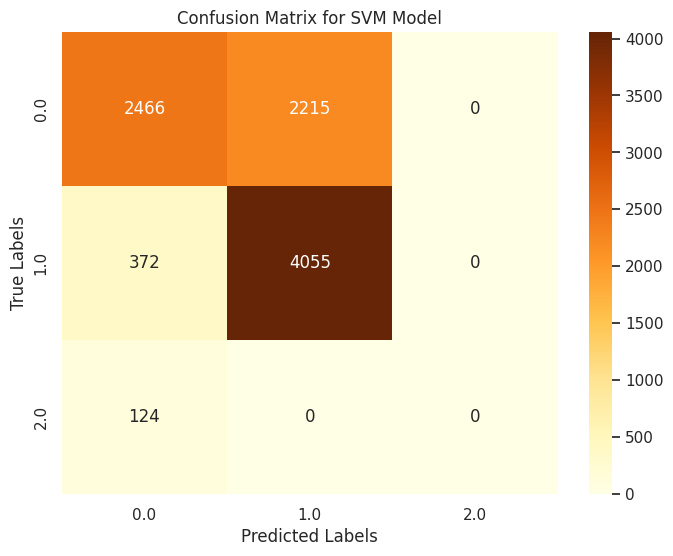

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-113-7b0122c835fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


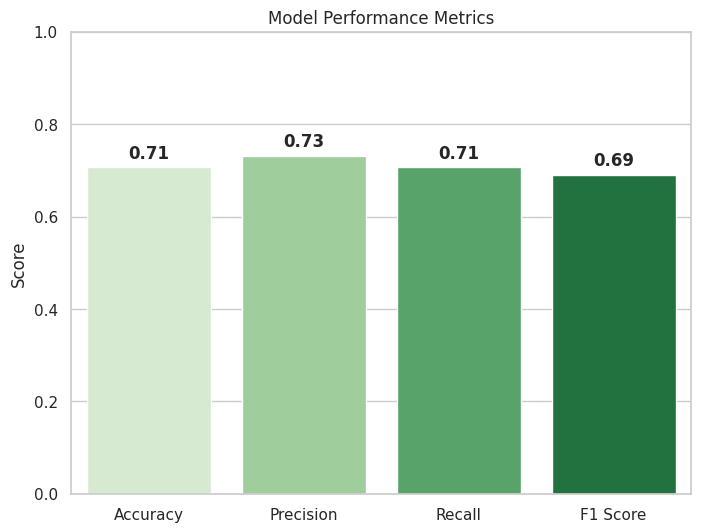

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_svm, precision_PatientStatus_p3_svm, recall_PatientStatus_p3_svm, f1_PatientStatus_p3_svm]

c

##Accuracy (y-axis) VS Kernel (x-axis)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)


# Linear Kernel
model_linear = SVC(kernel='linear', random_state=42)
model_linear.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_linear = model_linear.predict(X_test_PatientStatus_p3_svm)
accuracy_linear = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_linear)




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# Poly Kernel
model_poly = SVC(kernel='poly', random_state=42)
model_poly.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_poly = model_poly.predict(X_test_PatientStatus_p3_svm)
accuracy_poly = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_poly)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# RBF Kernel
model_rbf = SVC(kernel='rbf', random_state=42)
model_rbf.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_rbf = model_rbf.predict(X_test_PatientStatus_p3_svm)
accuracy_rbf = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_rbf)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid', random_state=42)
model_sigmoid.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_sigmoid = model_sigmoid.predict(X_test_PatientStatus_p3_svm)
accuracy_sigmoid = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_sigmoid)



In [ ]:
# Results and Plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]



<ipython-input-120-2338ad6054e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")


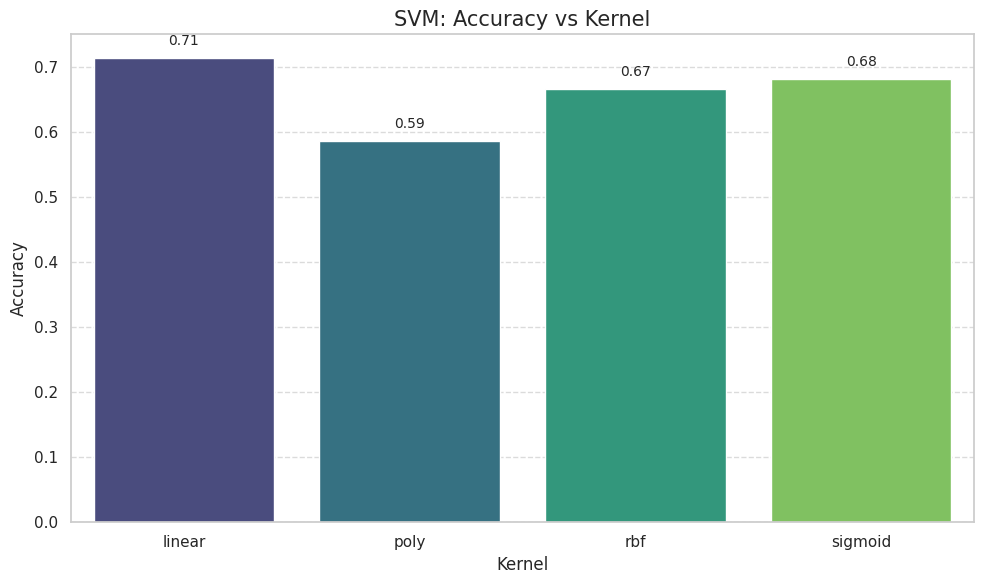

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")

# Adding labels and title
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('SVM: Accuracy vs Kernel', fontsize=15)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar plot with accuracy values
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# Comparison table for the performance of all models

In [ ]:
data_injurytype = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [accuracy_InjuryType_p2, accuracy_InjuryType_p3_dt, accuracy_InjuryType_p3_svm],
    "Precision": [precision_InjuryType_p2, precision_InjuryType_p3_dt, precision_InjuryType_p3_svm],
    "Recall": [recall_InjuryType_p2, recall_InjuryType_p3_dt, recall_InjuryType_p3_svm],
    "F1 Score": [f1_InjuryType_p2, f1_InjuryType_p3_dt, f1_InjuryType_p3_svm],
}


data_patientstatus = {
    "Model": ["Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [accuracy_PatientStatus_p2, accuracy_PatientStatus_p3_dt, accuracy_PatientStatus_p3_svm],
    "Precision": [precision_PatientStatus_p2, precision_PatientStatus_p3_dt, precision_PatientStatus_p3_svm],
    "Recall": [recall_PatientStatus_p2, recall_PatientStatus_p3_dt, recall_PatientStatus_p3_svm],
    "F1 Score": [f1_PatientStatus_p2, f1_PatientStatus_p3_dt, f1_PatientStatus_p3_svm],
}


df_injurytype = pd.DataFrame(data_injurytype)
df_patientstatus = pd.DataFrame(data_patientstatus)


def style_table(df, title):
    styled_df = (
        df.style
        .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Format numeric columns
        .set_table_styles(
            [   # Header style
                {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center")]},  # Center data
            ]
        )
        .set_properties(subset=["Model"], **{"font-weight": "bold", "color": "#2E8B57"})  # Bold Model column
        .background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Add gradient
    )
    styled_df = styled_df.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("color", "#333"), ("font-weight", "bold")]}]
    )
    return styled_df


display(style_table(df_injurytype, "Comparison Table for InjuryType"))
display(style_table(df_patientstatus, "Comparison Table for PatientStatus"))

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7566,0.6320,0.7566,0.6544
1,Decision Tree,0.6684,0.6776,0.6684,0.6729
2,SVM,0.7575,0.5738,0.7575,0.6529


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7288,0.7351,0.7288,0.7231
1,Decision Tree,0.6628,0.6626,0.6628,0.6627
2,SVM,0.7063,0.7323,0.7063,0.6907


#Assignment 4 (Phase 4)

#For InjuryType

##Split Into Train and Test Sets for InjuryType

In [ ]:
# Assuming 'df' is your DataFrame
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p4, X_test_InjuryType_p4, y_train_InjuryType_p4, y_test_InjuryType_p4 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

##Model Train and Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier



# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train_InjuryType_p4, y_train_InjuryType_p4)
    # Predict on test set
    y_pred = model.predict(X_test_InjuryType_p4)

    # Calculate metrics
    accuracy = accuracy_score(y_test_InjuryType_p4, y_pred)
    precision = precision_score(y_test_InjuryType_p4, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_InjuryType_p4, y_pred, average='weighted')
    f1 = f1_score(y_test_InjuryType_p4, y_pred, average='weighted')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion_matrix(y_test_InjuryType_p4, y_pred)
    }
    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Training Random Forest...
Metrics for Random Forest:
Accuracy: 0.7550
Precision: 0.6815
Recall: 0.7550
F1 Score: 0.6951

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
Accuracy: 0.7602
Precision: 0.6900
Recall: 0.7602
F1 Score: 0.6925

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Metrics for AdaBoost:
Accuracy: 0.7672
Precision: 0.7091
Recall: 0.7672
F1 Score: 0.6760



##confusion matrix plot

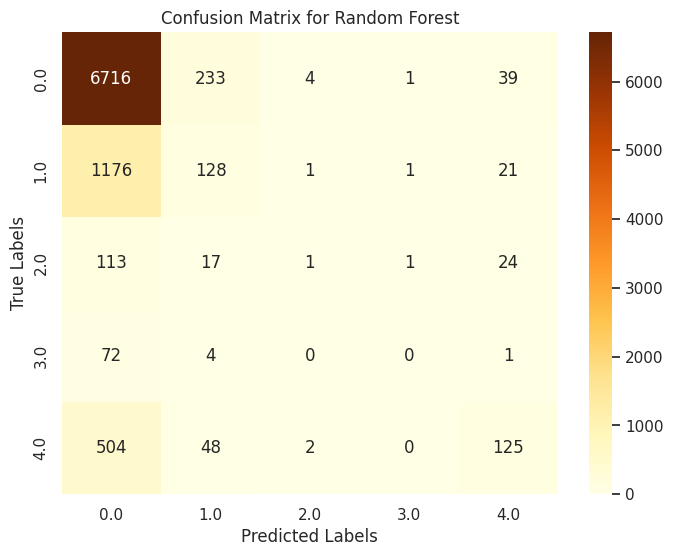

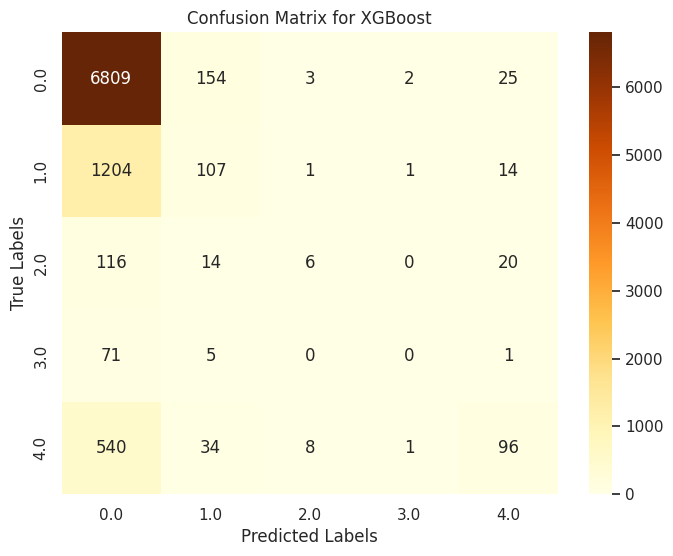

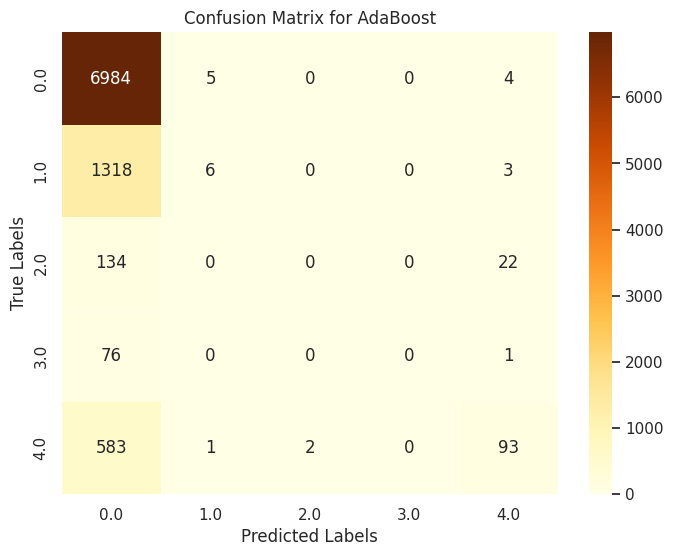

In [ ]:
# Plot Confusion Matrix for each model
for model_name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=models["Random Forest"].classes_,
                yticklabels=models["Random Forest"].classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


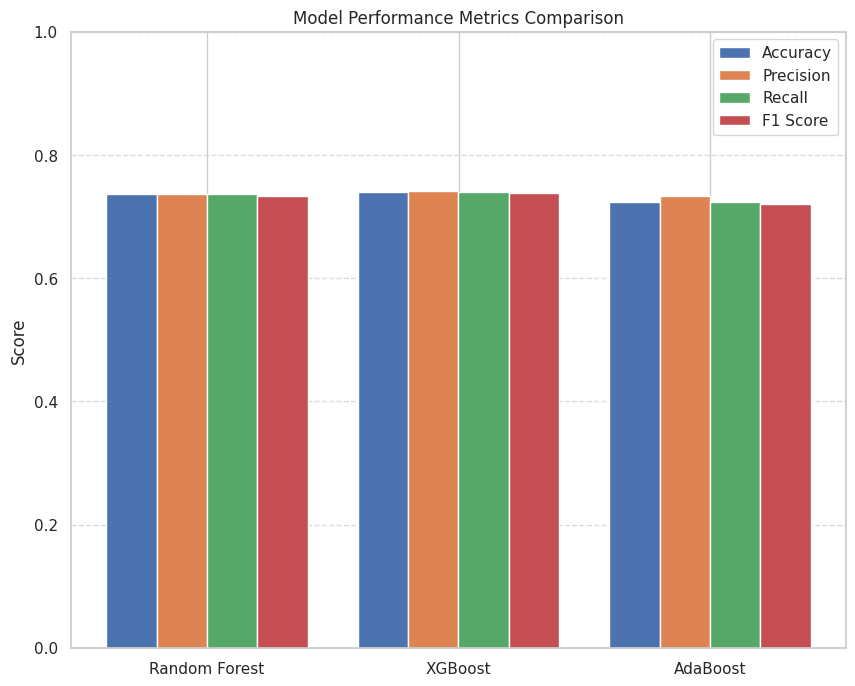

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = {metric: [results[model_name][metric] for model_name in models.keys()] for metric in metrics}

# Convert to bar plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(10, 8))

for idx, metric in enumerate(metrics):
    plt.bar(x + idx * width, scores[metric], width, label=metric)

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, models.keys())  # Center group labels
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#For PatientStatus

##Split Into Train and Test Sets for PatientStatus

In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p4, X_test_PatientStatus_p4, y_train_PatientStatus_p4, y_test_PatientStatus_p4 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


##Model Train and Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train_PatientStatus_p4, y_train_PatientStatus_p4)
    # Predict on test set
    y_pred = model.predict(X_test_PatientStatus_p4)

    # Calculate metrics
    accuracy = accuracy_score(y_test_PatientStatus_p4, y_pred)
    precision = precision_score(y_test_PatientStatus_p4, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_PatientStatus_p4, y_pred, average='weighted')
    f1 = f1_score(y_test_PatientStatus_p4, y_pred, average='weighted')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion_matrix(y_test_PatientStatus_p4, y_pred)
    }

    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

Training Random Forest...
Metrics for Random Forest:
Accuracy: 0.7368
Precision: 0.7373
Recall: 0.7368
F1 Score: 0.7338

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
Accuracy: 0.7395
Precision: 0.7416
Recall: 0.7395
F1 Score: 0.7375

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Metrics for AdaBoost:
Accuracy: 0.7238
Precision: 0.7327
Recall: 0.7238
F1 Score: 0.7201



##confusion matrix plot

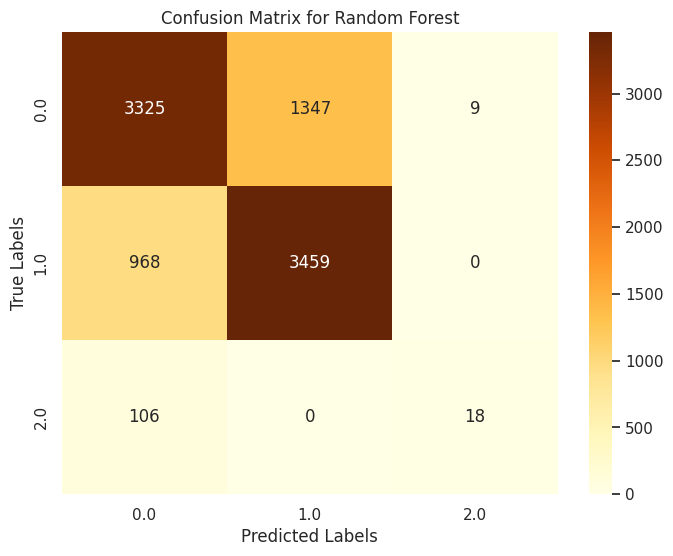

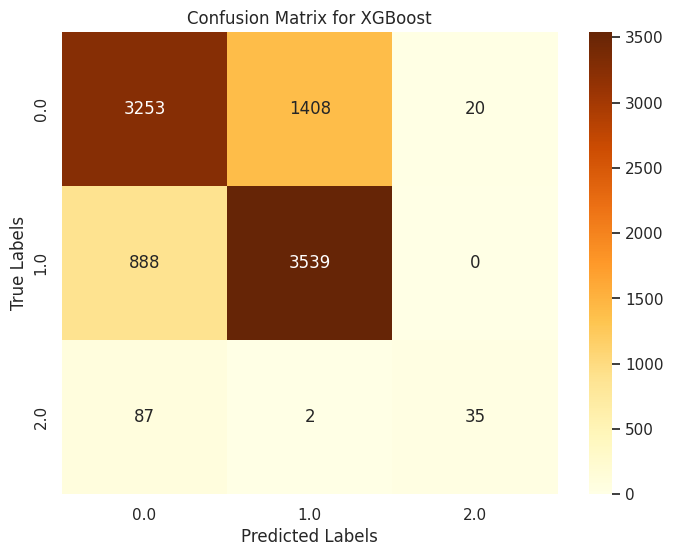

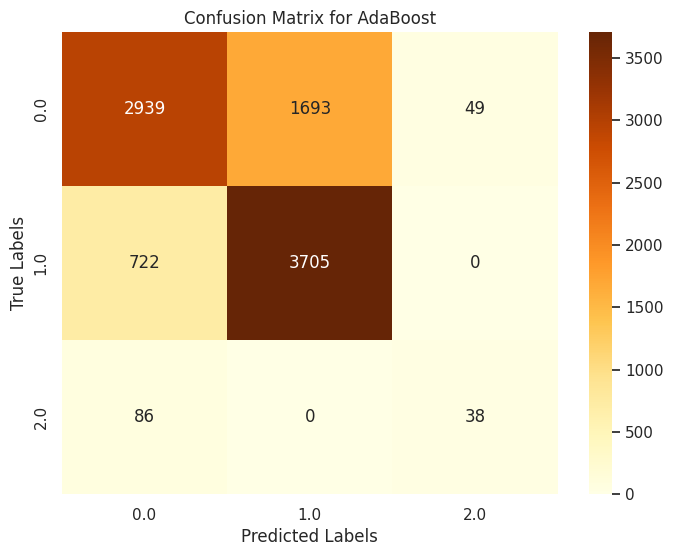

In [ ]:
for model_name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=models["Random Forest"].classes_,
                yticklabels=models["Random Forest"].classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


##Accuracy, Precision, Recall, F1 Score plot

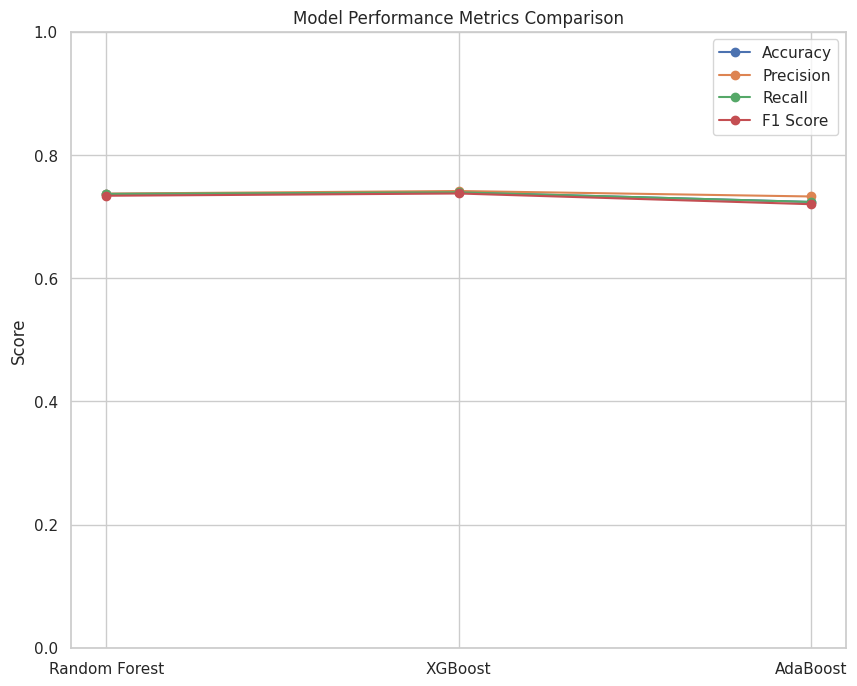

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = {metric: [results[model_name][metric] for model_name in models.keys()] for metric in metrics}

plt.figure(figsize=(10, 8))
for idx, metric in enumerate(metrics):
    plt.plot(models.keys(), scores[metric], marker='o', label=metric)

plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Comparison table for the performance of all models

In [ ]:
# Create comparison data for InjuryType
data_injurytype = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "SVM",
        "Random Forest",
        "XGBoost",
        "AdaBoost"
    ],
    "Accuracy": [
        accuracy_InjuryType_p2,
        accuracy_InjuryType_p3_dt,
        accuracy_InjuryType_p3_svm,
        results["Random Forest"]["Accuracy"],
        results["XGBoost"]["Accuracy"],
        results["AdaBoost"]["Accuracy"]
    ],
    "Precision": [
        precision_InjuryType_p2,
        precision_InjuryType_p3_dt,
        precision_InjuryType_p3_svm,
        results["Random Forest"]["Precision"],
        results["XGBoost"]["Precision"],
        results["AdaBoost"]["Precision"]
    ],
    "Recall": [
        recall_InjuryType_p2,
        recall_InjuryType_p3_dt,
        recall_InjuryType_p3_svm,
        results["Random Forest"]["Recall"],
        results["XGBoost"]["Recall"],
        results["AdaBoost"]["Recall"]
    ],
    "F1 Score": [
        f1_InjuryType_p2,
        f1_InjuryType_p3_dt,
        f1_InjuryType_p3_svm,
        results["Random Forest"]["F1 Score"],
        results["XGBoost"]["F1 Score"],
        results["AdaBoost"]["F1 Score"]
    ],
}

# Create comparison data for PatientStatus
data_patientstatus = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "SVM",
        "Random Forest",
        "XGBoost",
        "AdaBoost"
    ],
    "Accuracy": [
        accuracy_PatientStatus_p2,
        accuracy_PatientStatus_p3_dt,
        accuracy_PatientStatus_p3_svm,
        results["Random Forest"]["Accuracy"],
        results["XGBoost"]["Accuracy"],
        results["AdaBoost"]["Accuracy"]
    ],
    "Precision": [
        precision_PatientStatus_p2,
        precision_PatientStatus_p3_dt,
        precision_PatientStatus_p3_svm,
        results["Random Forest"]["Precision"],
        results["XGBoost"]["Precision"],
        results["AdaBoost"]["Precision"]
    ],
    "Recall": [
        recall_PatientStatus_p2,
        recall_PatientStatus_p3_dt,
        recall_PatientStatus_p3_svm,
        results["Random Forest"]["Recall"],
        results["XGBoost"]["Recall"],
        results["AdaBoost"]["Recall"]
    ],
    "F1 Score": [
        f1_PatientStatus_p2,
        f1_PatientStatus_p3_dt,
        f1_PatientStatus_p3_svm,
        results["Random Forest"]["F1 Score"],
        results["XGBoost"]["F1 Score"],
        results["AdaBoost"]["F1 Score"]
    ],
}

# Convert data to DataFrames
df_injurytype = pd.DataFrame(data_injurytype)
df_patientstatus = pd.DataFrame(data_patientstatus)

# Function to style the DataFrame
def style_table(df, title):
    styled_df = (
        df.style
        .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Format numeric columns
        .set_table_styles(
            [   # Header style
                {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center")]},  # Center data
            ]
        )
        .set_properties(subset=["Model"], **{"font-weight": "bold", "color": "#2E8B57"})  # Bold Model column
        .background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Add gradient
    )
    styled_df = styled_df.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("color", "#333"), ("font-weight", "bold")]}]
    )
    return styled_df

# Display the styled tables
display(style_table(df_injurytype, "Comparison Table for InjuryType"))
display(style_table(df_patientstatus, "Comparison Table for PatientStatus"))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7566,0.6320,0.7566,0.6544
1,Decision Tree,0.6684,0.6776,0.6684,0.6729
2,SVM,0.7575,0.5738,0.7575,0.6529
3,Random Forest,0.7368,0.7373,0.7368,0.7338
4,XGBoost,0.7395,0.7416,0.7395,0.7375
5,AdaBoost,0.7238,0.7327,0.7238,0.7201


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7288,0.7351,0.7288,0.7231
1,Decision Tree,0.6628,0.6626,0.6628,0.6627
2,SVM,0.7063,0.7323,0.7063,0.6907
3,Random Forest,0.7368,0.7373,0.7368,0.7338
4,XGBoost,0.7395,0.7416,0.7395,0.7375
5,AdaBoost,0.7238,0.7327,0.7238,0.7201


#Improvements For InjuryType

##Import Dataset

In [ ]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-278-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


##Droping Features

As usual we will drop EcNumber, HospitalName, EcYear and CallTime were removed as they do not exhibit any significant correlation with the target variable.

In [ ]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear', 'CallTime'], axis=1)

##Filling the Missing Values

While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.





In [ ]:
#missing values
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
PatientStatus,2


In [ ]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender' ,'PatientStatus'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-281-a5da0e5dd916>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


##Duplicate Value

In [ ]:
df.duplicated().sum()

28

In [ ]:
df.drop_duplicates(inplace =True)

##Encoding the categorical columns

Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause


Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [ ]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


In [ ]:
# Delete the whole row where EducationTitle is 0
df = df[df['EducationTitle'] != '0']
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9


###Info EducationTitle Encoding

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



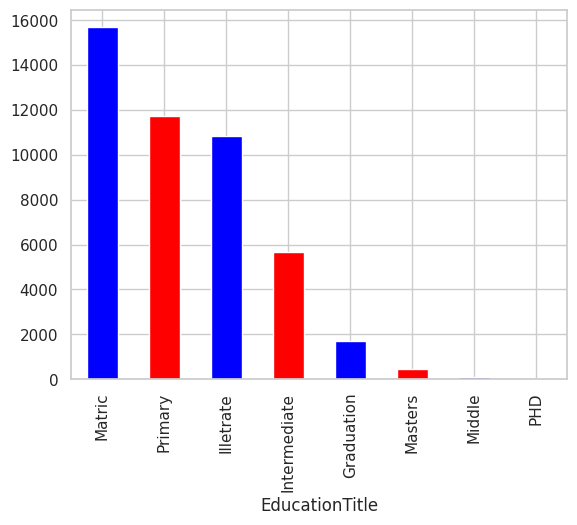

In [ ]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

In [ ]:
encoder=OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  object 
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  object 
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

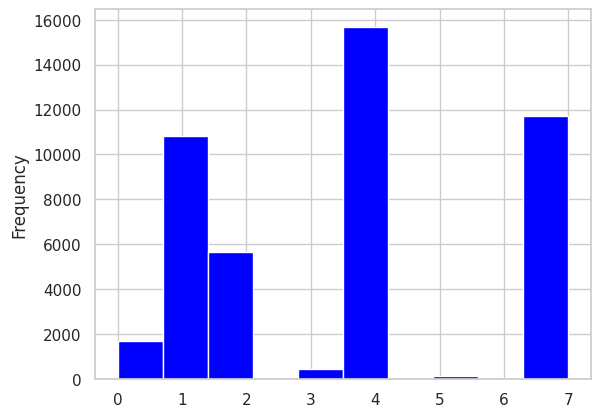

In [ ]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

The histogram shows the distribution of EducationTitle in a dataset. It reveals that most people have education title 5, with fewer people having higher titles and even fewer having lower titles. There are also a few outliers with very high education titles.








\

###EducationTitle Visualization Box plot

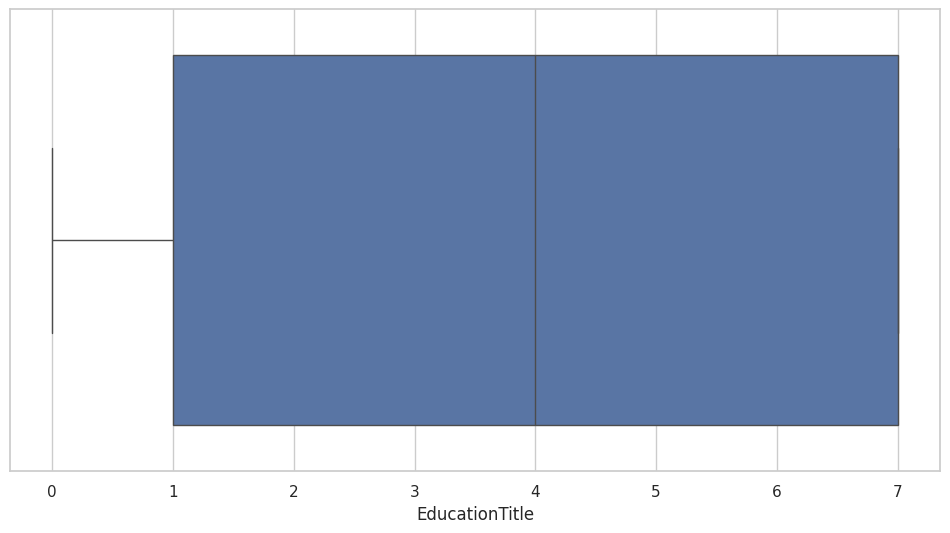

In [ ]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

The median education title is 5, indicating that 50% of the individuals have an education title less than or equal to 5.

The box plot shows a slight right skew, as the whisker on the right side is longer than the whisker on the left side. This indicates that there are a few individuals with higher education titles, but the majority of individuals have lower education titles.


In [ ]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34766
Single Fracture,6736
Head Injury,3499
Multiple Fractures,778
Spinal Injury,381


###Info InjuryType Encoding

```
We are using ordinal encoding for "InjuryType" because this method assigns numerical values to categories based on a meaningful order.
 In the case of injury severity, there is a natural hierarchy from minor to more serious conditions. For example:

1. Minor
2. Single Fracture
3. Head Injury
4. Multiple Fractures
5. Spinal Injury

By using ordinal encoding, you can capture this ordinal relationship, where higher numbers represent more severe injuries.
```



###InjuryType Visualization Bar Chart

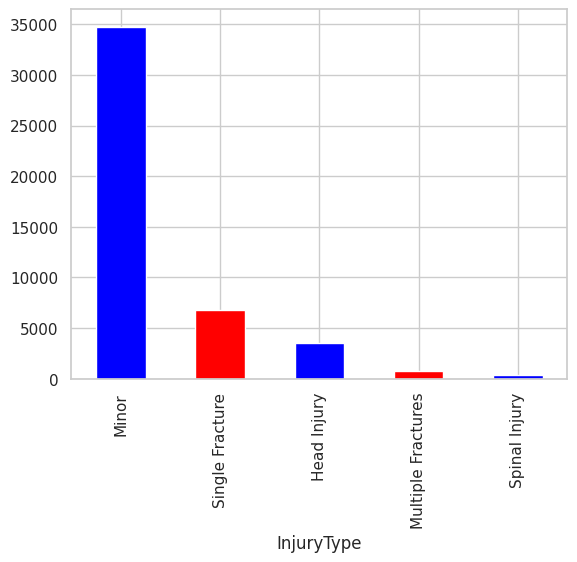

In [ ]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [ ]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType'] = ordinal_encoder.fit_transform(df[['InjuryType']])



In [ ]:
df['InjuryType'].value_counts()

,count
InjuryType,
0.0,34766
1.0,6736
4.0,3499
2.0,778
3.0,381


###InjuryType Visualization histogram


<ipython-input-294-4a235b854fad>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=injury_labels, order=injury_mapping.values(), palette=palette)


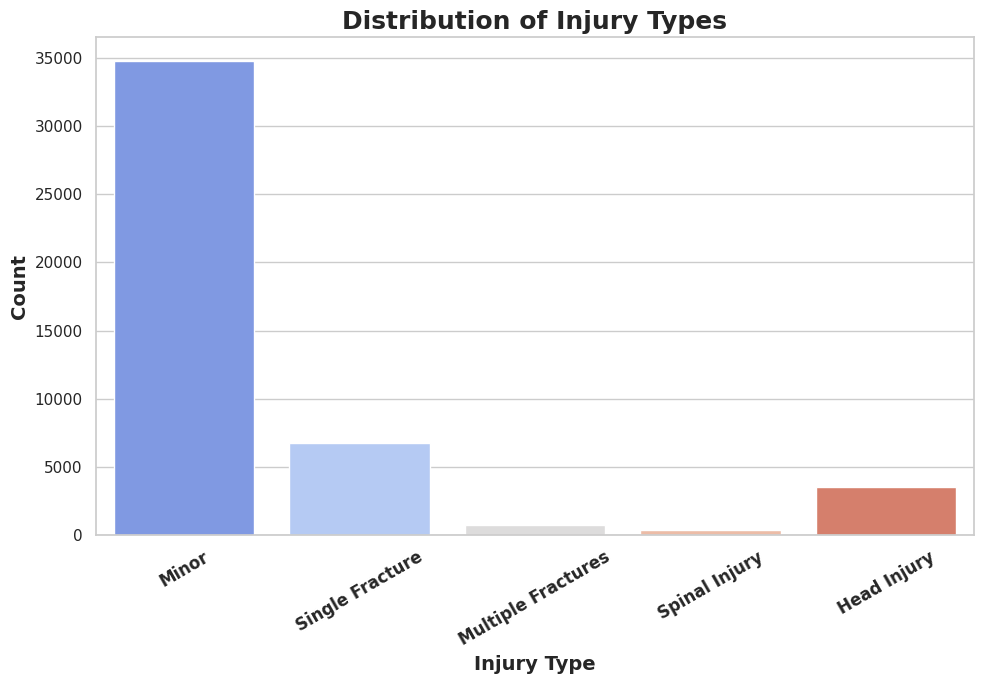

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map injury type codes to descriptive labels
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

# Convert encoded values to descriptive labels
encoded_values = df['InjuryType']
injury_labels = [injury_mapping[val] for val in encoded_values]

# Set up figure size and style
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")  # Use a clean grid style

# Use a modern color palette and sorted order
palette = sns.color_palette("coolwarm", len(injury_mapping))
sns.countplot(x=injury_labels, order=injury_mapping.values(), palette=palette)

# Add a title and axis labels with larger fonts and bold text
plt.title('Distribution of Injury Types', fontsize=18, weight='bold')
plt.xlabel('Injury Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23765
Alive & stable,21811
Dead,584


###Info Patient status Encoding

```
For the columns Patient status, we will apply Ordinal Encoding,
because these features have a strong inherent order
```

###InjuryType Visualization Bar Chart

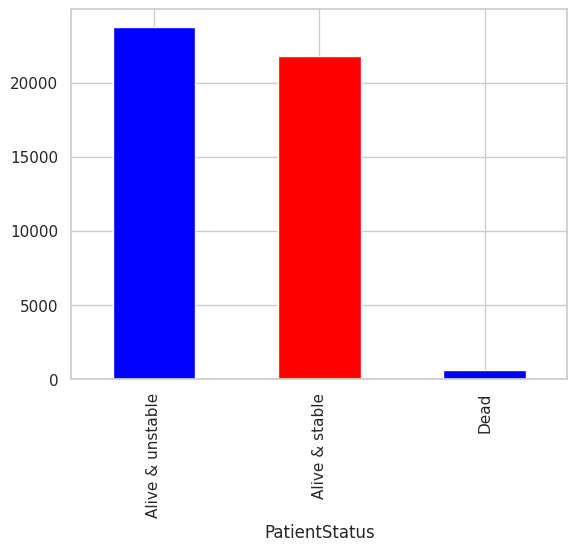

In [ ]:
df['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()


###PatientStatus Encoding


In [ ]:
# Define the categories for encoding
PatientStatus = [['Alive & unstable', 'Alive & stable', 'Dead']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=PatientStatus)

# Ensure the column is of type object or string
df['PatientStatus'] = df['PatientStatus']
# Apply the encoder to transform the column
df['PatientStatus'] = encoder.fit_transform(df[['PatientStatus']])

# Check the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['PatientStatus'].value_counts()


,count
PatientStatus,
0.0,23765
1.0,21811
2.0,584


<ipython-input-299-862bac0324eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


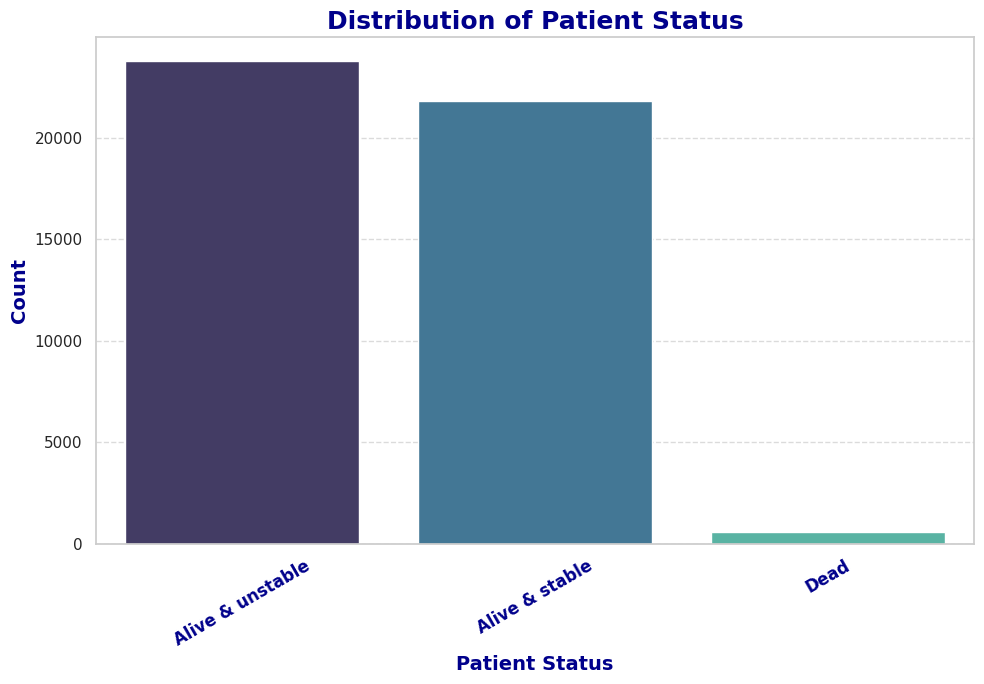

In [ ]:
# Ensure PatientStatus contains integers
encoded_values = df['PatientStatus']

# Map the encoded values back to descriptive labels
PatientStatus_mapping = {0: 'Alive & unstable', 1: 'Alive & stable', 2: 'Dead'}
PatientStatus_mapping_labels = [PatientStatus_mapping[val] for val in encoded_values]

# Prepare the plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("mako", len(PatientStatus_mapping))

# Plot the data using a count plot
sns.countplot(
    x=PatientStatus_mapping_labels,
    order=list(PatientStatus_mapping.values()),  # Ensure correct order
    palette=palette
)

# Add a title and labels with custom fonts
plt.title('Distribution of Patient Status', fontsize=18, weight='bold', color="darkblue")
plt.xlabel('Patient Status', fontsize=14, weight='bold', color="darkblue")
plt.ylabel('Count', fontsize=14, weight='bold', color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold', color="darkblue")

# Add grid lines for better data visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##Target Encoding(Improve)

In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


In [ ]:
df['Reason'].value_counts()

,count
Reason,
same,2318
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1
Unknown van hit the bike (APF-22 US 70cc) and runaway,1


###Fill 'Same' data with forward fill

In [ ]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-302-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


In [ ]:
df['Reason'].value_counts()

,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


In [ ]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29569
Carelessness,14168
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


In [ ]:
df['Cause_Reason'] = df['Cause'] + "_" + df['Reason'] + "_" + df['EmergencyArea']

The Cause feature details accident triggers, while Reason
provides contextual circumstances. To enhance their predictive power, we propose merging them into a single feature
cause_reason.

cause_reason should be combined with EmergencyArea to
identify location-specific accident patterns, further improving
model predictions

In [ ]:
#drop reason and cause column
df.drop(['Reason', 'Cause','EmergencyArea'], axis=1, inplace=True)

In [ ]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
"Carelessness_Tractor over truned due to brake fail_ bahria town phase 07 globe chowk, front of baitul islam rwp",12
"Carelessness_ Toyota Hiace (RIR-1599) ka tyre brust huwa or road k sath drakht mein jaa k laga_ Infront of AL-HARAM CITY Gate, Chakri Road, RWP",9
"Over Speed_ According to victims due to rain slippery road.. collision between 2 bushes ::::Les 5177 and. caf#4242_ near brahama interchange,motorway t/w peshawer",9
Over Speed_Truck hit Hi-Ace _Mandra Tolla Plaza GT Road,9
Over Speed_car hit bike_Shah khalid colony main stop Airport raod rwp.,8
...,...
Over Speed_Car hit the Bike_flying club airport road rwp,1
Over Speed_Collision between Bike and Rickshaw _nadra office attock petrol pump,1
Carelessness_Female cloth stuck in bike chain and Fall from Bike _duble road signal rwp,1


In [ ]:
# encoder = LabelEncoder()
# df['Cause'] = encoder.fit_transform(df['Cause'])
encoding_map = df.groupby("Cause_Reason")["InjuryType"].mean()

# Replace EmergencyArea with the encoded value
df["Cause_Reason"] = df["Cause_Reason"].map(encoding_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  object 
 1   Gender                    46160 non-null  object 
 2   Age                       46160 non-null  float64
 3   responsetime              46160 non-null  float64
 4   EducationTitle            46160 non-null  float64
 5   InjuryType                46160 non-null  float64
 6   PatientStatus             46160 non-null  float64
 7   BicycleInvovled           46160 non-null  float64
 8   BikesInvolved             46160 non-null  float64
 9   BusesInvolved             46160 non-null  float64
 10  CarsInvolved              46160 non-null  float64
 11  CartInvovled              46160 non-null  float64
 12  RickshawsInvolved         46160 non-null  float64
 13  TractorInvovled           46160 non-null  float64
 14  TrainsInvov

Upon reviewing the dataset, we identified significant improvement opportunities in handling the Cause and
Reason features, which are strongly correlated with the target
variables InjuryType. So we do cause_reason target encoding with InjuryType



In [ ]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
0.000000,33706
1.000000,6195
4.000000,3024
2.000000,1169
0.500000,812
3.000000,352
0.333333,156
2.500000,154
1.500000,122


##One Hot Encoding

###Info Gender Encoding

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



In [ ]:
df['Gender'].value_counts()



,count
Gender,
Male,39770
Female,6389
Other,1


In [ ]:
#print the '0' column whole row from gender
df[df['Gender'] == '0']



,TotalPatientsInEmergency,Gender,Age,responsetime,EducationTitle,InjuryType,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Cause_Reason


As the TotalPatientsInEmergency is not in perfect form same goes for Gender we can just delete this row

In [ ]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == '0'].index, inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,39770
Female,6389
Other,1


###Gender One Hot Encode

In [ ]:
#convert gender into one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  object 
 1   Age                       46160 non-null  float64
 2   responsetime              46160 non-null  float64
 3   EducationTitle            46160 non-null  float64
 4   InjuryType                46160 non-null  float64
 5   PatientStatus             46160 non-null  float64
 6   BicycleInvovled           46160 non-null  float64
 7   BikesInvolved             46160 non-null  float64
 8   BusesInvolved             46160 non-null  float64
 9   CarsInvolved              46160 non-null  float64
 10  CartInvovled              46160 non-null  float64
 11  RickshawsInvolved         46160 non-null  float64
 12  TractorInvovled           46160 non-null  float64
 13  TrainsInvovled            46160 non-null  float64
 14  TrucksInvol

##Convert TotalPatientsInEmergency into numerical

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1119
3,448
4,361
5,185
4,117


In [ ]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  float64
 1   Age                       46160 non-null  float64
 2   responsetime              46160 non-null  float64
 3   EducationTitle            46160 non-null  float64
 4   InjuryType                46160 non-null  float64
 5   PatientStatus             46160 non-null  float64
 6   BicycleInvovled           46160 non-null  float64
 7   BikesInvolved             46160 non-null  float64
 8   BusesInvolved             46160 non-null  float64
 9   CarsInvolved              46160 non-null  float64
 10  CartInvovled              46160 non-null  float64
 11  RickshawsInvolved         46160 non-null  float64
 12  TractorInvovled           46160 non-null  float64
 13  TrainsInvovled            46160 non-null  float64
 14  TrucksInvol

In [ ]:
import pandas as pd
import numpy as np

df['TotalPatientsInEmergency'] = np.log1p(df['TotalPatientsInEmergency'])

the TotalPatientsInEmergency feature should be evaluated for
transformations or feature interactions to maximize its utility
in predictive modeling.

                  X′ = log(X)

where X is the original value, and X′ is the transformed value.

Log transformation is useful for handling data with a wide dynamic range or significant skewness, as seen in my dataset . It reduces the impact of extreme values by compressing larger numbers and expanding smaller ones, creating a more balanced distribution. This helps stabilize variance, improve visualization by making smaller values more noticeable, and enhance the performance of statistical models by approximating normality and linearizing multiplicative relationships.

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
0.693147,36151
1.098612,7313
1.386294,1567
1.609438,478
1.791759,255
1.945910,131
2.079442,98
2.197225,55
2.302585,45


#Assignment 2(Phase 2)



#For InjuryType

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p2, X_test_InjuryType_p2, y_train_InjuryType_p2, y_test_InjuryType_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)


##Model Train

In [ ]:
model = LogisticRegression(random_state=42,solver='newton-cg')
model.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
y_pred_InjuryType_p2 = model.predict(X_test_InjuryType_p2)

In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p2 = accuracy_score(y_test_InjuryType_p2, y_pred_InjuryType_p2)
precision_InjuryType_p2 = precision_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted', zero_division=0)
recall_InjuryType_p2 = recall_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')
f1_InjuryType_p2 = f1_score(y_test_InjuryType_p2, y_pred_InjuryType_p2, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p2:.4f}")
print(f"Precision: {precision_InjuryType_p2:.4f}")
print(f"Recall: {recall_InjuryType_p2:.4f}")
print(f"F1 Score: {f1_InjuryType_p2:.4f}")

Accuracy: 0.9571
Precision: 0.9526
Recall: 0.9571
F1 Score: 0.9535


<ipython-input-321-38542f7026c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


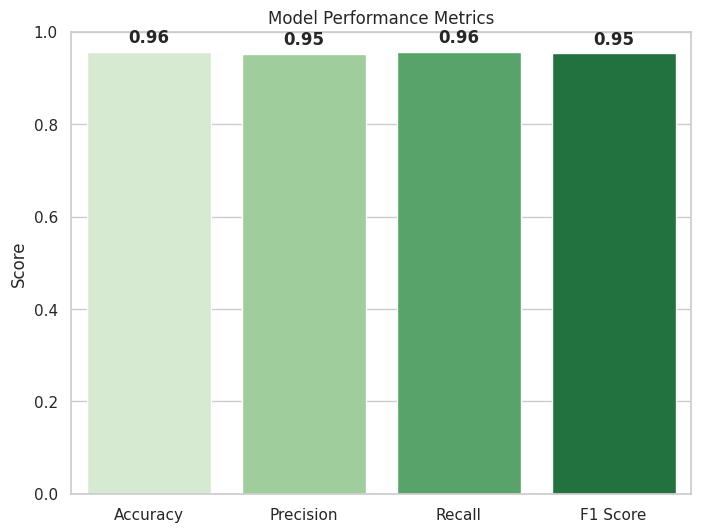

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p2, precision_InjuryType_p2, recall_InjuryType_p2, f1_InjuryType_p2]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Solver and Max_iter

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

solver_results = []
max_iter_results = []
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
    y_pred_solver = model_solver.predict(X_test_InjuryType_p2)

    # Calculate metrics
    accuracy_solver = accuracy_score(y_test_InjuryType_p2, y_pred_solver)


    solver_results.append((solver, accuracy_solver))

# Evaluate each max_iter
for max_iter in max_iters:
    model_max_iter = LogisticRegression(max_iter=max_iter)
    model_max_iter.fit(X_train_InjuryType_p2, y_train_InjuryType_p2)
    y_pred_max_iter = model_max_iter.predict(X_test_InjuryType_p2)

    # Calculate metrics
    accuracy_max_iter = accuracy_score(y_test_InjuryType_p2, y_pred_max_iter)


    max_iter_results.append((max_iter, accuracy_max_iter))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

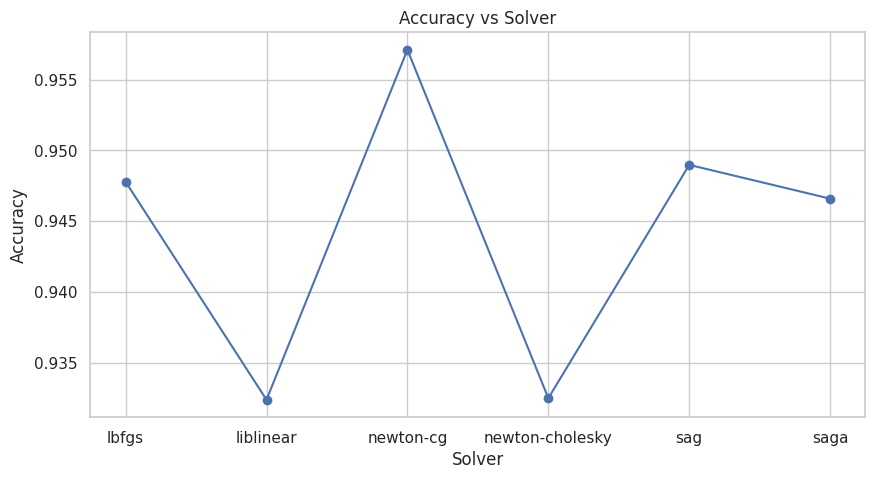

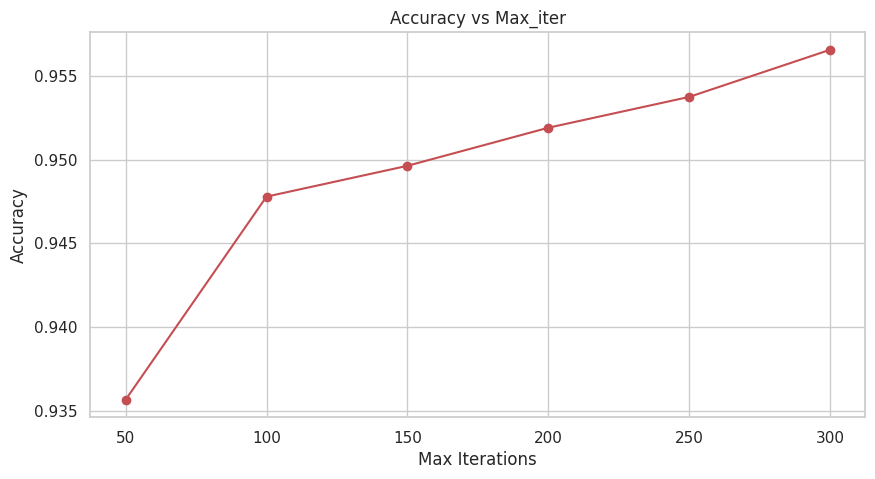

In [ ]:
solvers = [result[0] for result in solver_results]
solver_accuracies = [result[1] for result in solver_results]

max_iters = [result[0] for result in max_iter_results]
max_iter_accuracies = [result[1] for result in max_iter_results]

# Plot Accuracy vs Solver
plt.figure(figsize=(10, 5))
plt.plot(solvers, solver_accuracies, marker='o', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

# Plot Accuracy vs Max_iter
plt.figure(figsize=(10, 5))
plt.plot(max_iters, max_iter_accuracies, marker='o', color='r')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

# Assignment 3(Phase 3)


# For InjuryType

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_dt, X_test_InjuryType_p3_dt, y_train_InjuryType_p3_dt, y_test_InjuryType_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer

# Train the train set on desicion tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(X_train_InjuryType_p3_dt, y_train_InjuryType_p3_dt)
y_pred_InjuryType_p3_dt = model.predict(X_test_InjuryType_p3_dt)

In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_dt = accuracy_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
precision_InjuryType_p3_dt = precision_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted', zero_division=0)
recall_InjuryType_p3_dt = recall_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')
f1_InjuryType_p3_dt = f1_score(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_dt:.4f}")
print(f"Precision: {precision_InjuryType_p3_dt:.4f}")
print(f"Recall: {recall_InjuryType_p3_dt:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_dt:.4f}")

Accuracy: 0.9704
Precision: 0.9736
Recall: 0.9704
F1 Score: 0.9710


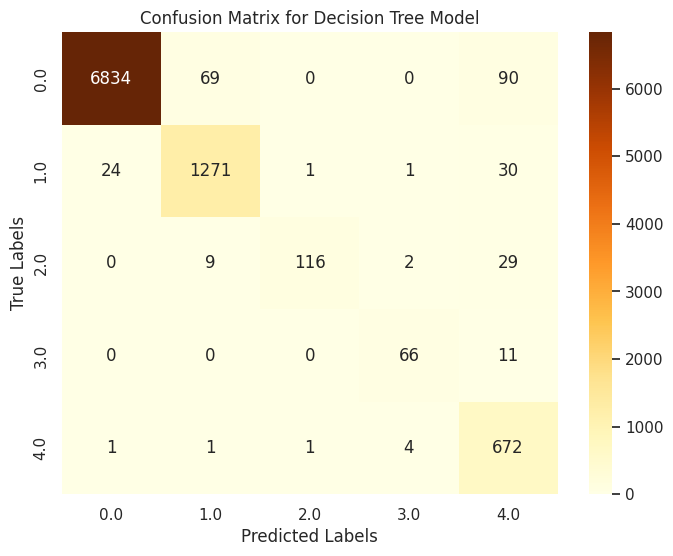

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_dt, y_pred_InjuryType_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-328-1c335c76aa81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


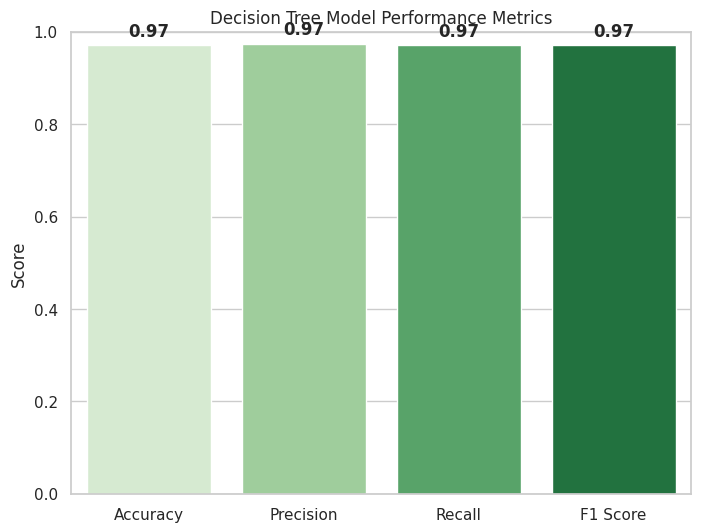

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_dt, precision_InjuryType_p3_dt, recall_InjuryType_p3_dt, f1_InjuryType_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Decision Tree Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Max_depth (x-axis)

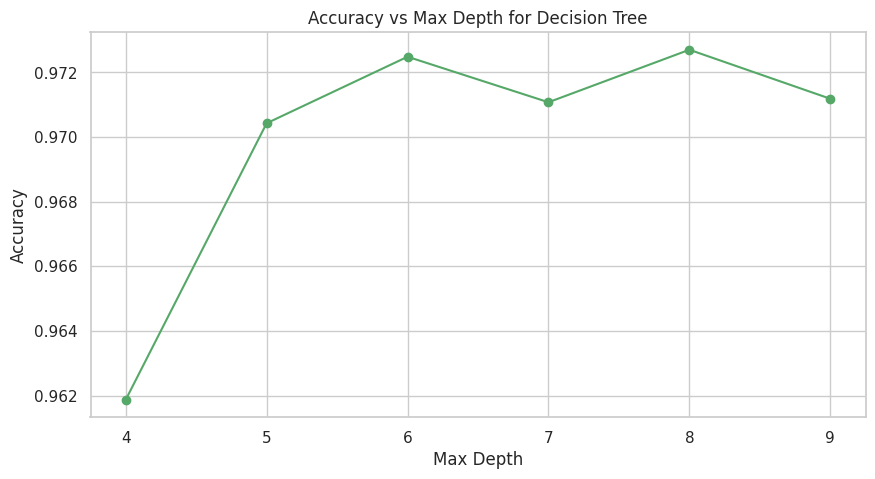

In [ ]:
# Splitting data
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

X_train_InjuryType_p3_dt, X_test_InjuryType_p3_dt, y_train_InjuryType_p3_dt, y_test_InjuryType_p3_dt = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define max_depth values
max_depths = [4, 5, 6, 7, 8, 9]

# Store results
max_depth_results = []

# Evaluate each max_depth
for max_depth in max_depths:
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train_InjuryType_p3_dt, y_train_InjuryType_p3_dt)
    y_pred_dt = model_dt.predict(X_test_InjuryType_p3_dt)

    # Calculate metrics
    accuracy_dt = accuracy_score(y_test_InjuryType_p3_dt, y_pred_dt)
    max_depth_results.append((max_depth, accuracy_dt))

# Extract max_depths and accuracies
max_depths = [result[0] for result in max_depth_results]
accuracies = [result[1] for result in max_depth_results]

# Plot Accuracy vs Max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o', color='g')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.grid(True)
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for InjuryType

In [ ]:
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
# Model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_InjuryType_p3_svm = model.predict(X_test_InjuryType_p3_svm)

In [ ]:
#accuray , precision recall f1 score measure
accuracy_InjuryType_p3_svm = accuracy_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
precision_InjuryType_p3_svm = precision_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted', zero_division=0)
recall_InjuryType_p3_svm = recall_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')
f1_InjuryType_p3_svm = f1_score(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_InjuryType_p3_svm:.4f}")
print(f"Precision: {precision_InjuryType_p3_svm:.4f}")
print(f"Recall: {recall_InjuryType_p3_svm:.4f}")
print(f"F1 Score: {f1_InjuryType_p3_svm:.4f}")

Accuracy: 0.9442
Precision: 0.9245
Recall: 0.9442
F1 Score: 0.9336


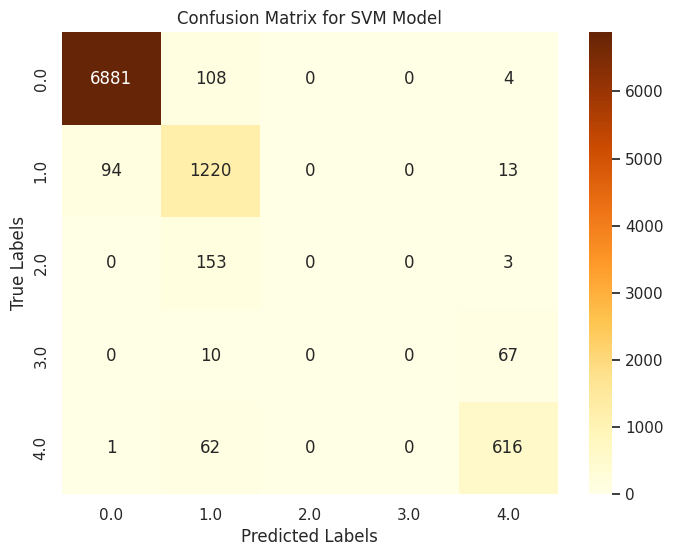

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_InjuryType_p3_svm, y_pred_InjuryType_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-334-3fe757452813>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


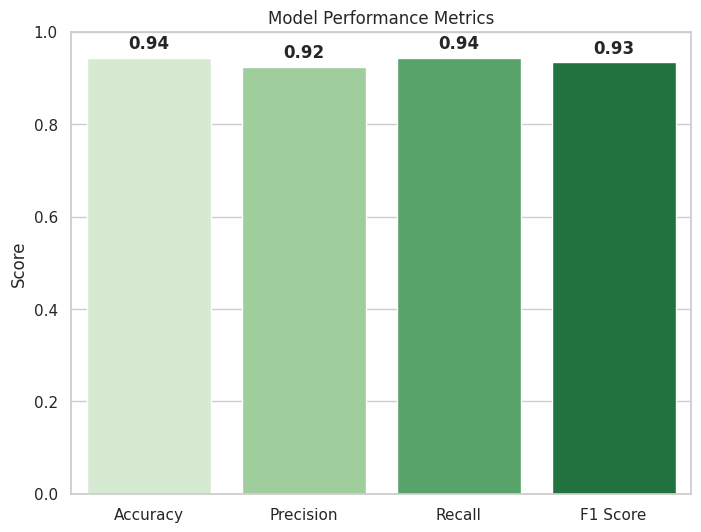

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_InjuryType_p3_svm, precision_InjuryType_p3_svm, recall_InjuryType_p3_svm, f1_InjuryType_p3_svm]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Kernel (x-axis)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()



# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)




model_linear = SVC(kernel='linear')
model_linear.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_linear = model_linear.predict(X_test_InjuryType_p3_svm)
accuracy_linear = accuracy_score(y_test_InjuryType_p3_svm, y_pred_linear)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# Poly Kernel
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_poly = model_poly.predict(X_test_InjuryType_p3_svm)
accuracy_poly = accuracy_score(y_test_InjuryType_p3_svm, y_pred_poly)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# RBF Kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_rbf = model_rbf.predict(X_test_InjuryType_p3_svm)
accuracy_rbf = accuracy_score(y_test_InjuryType_p3_svm, y_pred_rbf)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()


# Define features and target
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p3_svm, X_test_InjuryType_p3_svm, y_train_InjuryType_p3_svm, y_test_InjuryType_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_InjuryType_p3_svm = scaler.fit_transform(X_train_InjuryType_p3_svm)
X_test_InjuryType_p3_svm = scaler.transform(X_test_InjuryType_p3_svm)

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train_InjuryType_p3_svm, y_train_InjuryType_p3_svm)
y_pred_sigmoid = model_sigmoid.predict(X_test_InjuryType_p3_svm)
accuracy_sigmoid = accuracy_score(y_test_InjuryType_p3_svm, y_pred_sigmoid)



In [ ]:
# Results and Plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]



<ipython-input-340-2338ad6054e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")


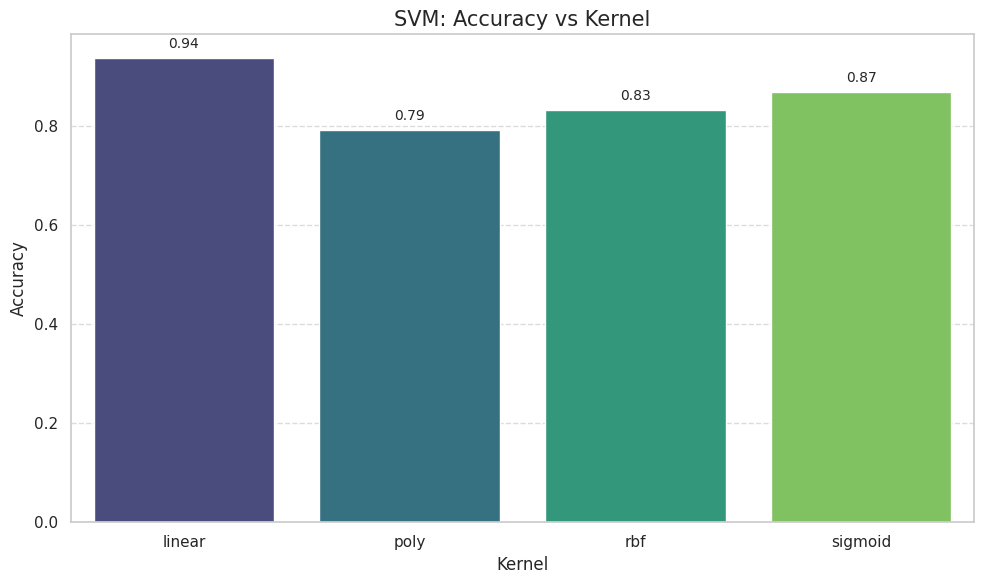

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")

# Adding labels and title
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('SVM: Accuracy vs Kernel', fontsize=15)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar plot with accuracy values
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


#Assignment 4 (Phase 4)

##Split Into Train and Test Sets for InjuryType

In [ ]:
# Assuming 'df' is your DataFrame
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p4, X_test_InjuryType_p4, y_train_InjuryType_p4, y_test_InjuryType_p4 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

##Model Train and Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
# Assuming 'df' is your DataFrame
X = df.drop(columns=['InjuryType'])
Y = df['InjuryType']

# Perform train-test split (80% train, 20% test)
X_train_InjuryType_p4, X_test_InjuryType_p4, y_train_InjuryType_p4, y_test_InjuryType_p4 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier



# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train_InjuryType_p4, y_train_InjuryType_p4)
    # Predict on test set
    y_pred = model.predict(X_test_InjuryType_p4)

    # Calculate metrics
    accuracy = accuracy_score(y_test_InjuryType_p4, y_pred)
    precision = precision_score(y_test_InjuryType_p4, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_InjuryType_p4, y_pred, average='weighted')
    f1 = f1_score(y_test_InjuryType_p4, y_pred, average='weighted')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion_matrix(y_test_InjuryType_p4, y_pred)
    }
    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Training Random Forest...
Metrics for Random Forest:
Accuracy: 0.9652
Precision: 0.9653
Recall: 0.9652
F1 Score: 0.9651

Training XGBoost...
Metrics for XGBoost:
Accuracy: 0.9703
Precision: 0.9702
Recall: 0.9703
F1 Score: 0.9702

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Metrics for AdaBoost:
Accuracy: 0.9697
Precision: 0.9699
Recall: 0.9697
F1 Score: 0.9695



##confusion matrix plot

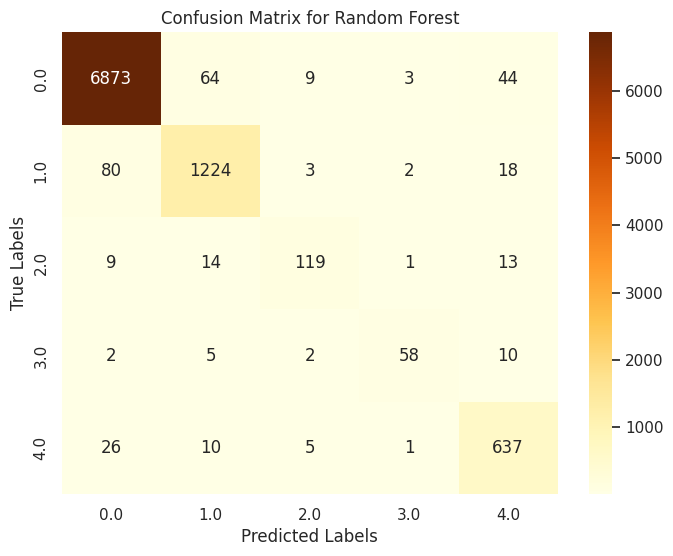

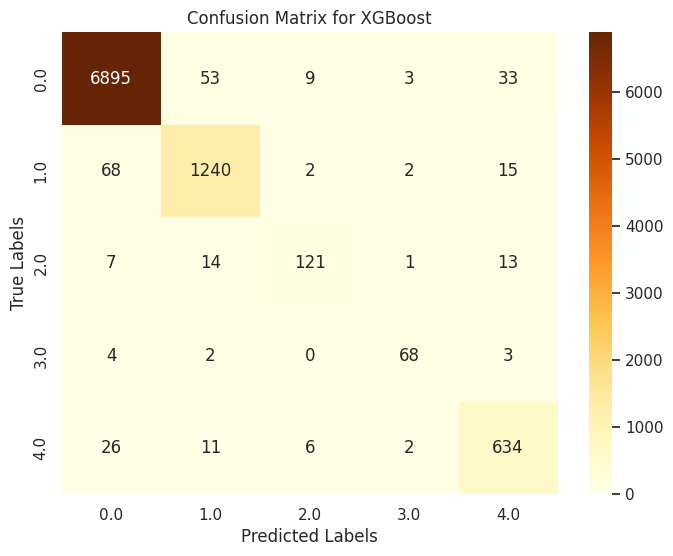

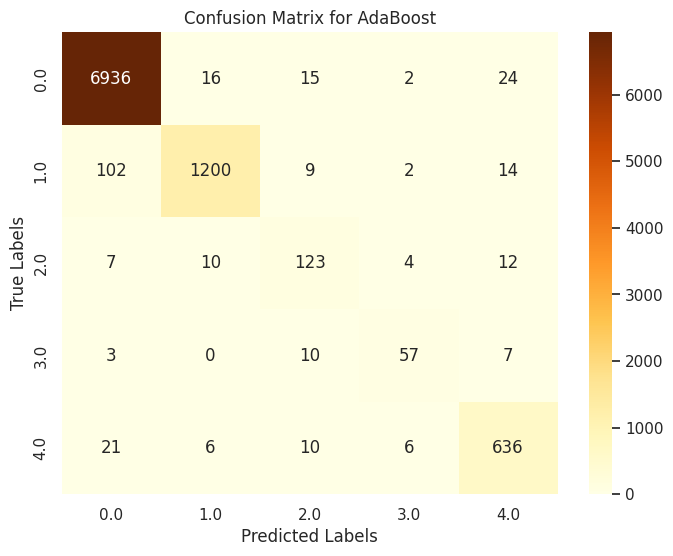

In [ ]:
# Plot Confusion Matrix for each model
for model_name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=models["Random Forest"].classes_,
                yticklabels=models["Random Forest"].classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


##Comparison for all model for InjuryType

In [ ]:
# Create comparison data for InjuryType
data_injurytype = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "SVM",
        "Random Forest",
        "XGBoost",
        "AdaBoost"
    ],
    "Accuracy": [
        accuracy_InjuryType_p2,
        accuracy_InjuryType_p3_dt,
        accuracy_InjuryType_p3_svm,
        results["Random Forest"]["Accuracy"],
        results["XGBoost"]["Accuracy"],
        results["AdaBoost"]["Accuracy"]
    ],
    "Precision": [
        precision_InjuryType_p2,
        precision_InjuryType_p3_dt,
        precision_InjuryType_p3_svm,
        results["Random Forest"]["Precision"],
        results["XGBoost"]["Precision"],
        results["AdaBoost"]["Precision"]
    ],
    "Recall": [
        recall_InjuryType_p2,
        recall_InjuryType_p3_dt,
        recall_InjuryType_p3_svm,
        results["Random Forest"]["Recall"],
        results["XGBoost"]["Recall"],
        results["AdaBoost"]["Recall"]
    ],
    "F1 Score": [
        f1_InjuryType_p2,
        f1_InjuryType_p3_dt,
        f1_InjuryType_p3_svm,
        results["Random Forest"]["F1 Score"],
        results["XGBoost"]["F1 Score"],
        results["AdaBoost"]["F1 Score"]
    ],
}



# Convert data to DataFrames
df_injurytype = pd.DataFrame(data_injurytype)


# Function to style the DataFrame
def style_table(df, title):
    styled_df = (
        df.style
        .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Format numeric columns
        .set_table_styles(
            [   # Header style
                {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center")]},  # Center data
            ]
        )
        .set_properties(subset=["Model"], **{"font-weight": "bold", "color": "#2E8B57"})  # Bold Model column
        .background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Add gradient
    )
    styled_df = styled_df.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("color", "#333"), ("font-weight", "bold")]}]
    )
    return styled_df

# Display the styled tables
display(style_table(df_injurytype, "Comparison Table for InjuryType"))



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9571,0.9526,0.9571,0.9535
1,Decision Tree,0.9704,0.9736,0.9704,0.9710
2,SVM,0.9442,0.9245,0.9442,0.9336
3,Random Forest,0.9652,0.9653,0.9652,0.9651
4,XGBoost,0.9703,0.9702,0.9703,0.9702
5,AdaBoost,0.9697,0.9699,0.9697,0.9695


#Improvements for PatientStatus

##Import Dataset

In [ ]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-346-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


##Droping Features

As usual we will drop EcNumber, HospitalName, EcYear and CallTime were removed as they do not exhibit any significant correlation with the target variable.

In [ ]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear', 'CallTime'], axis=1)

##Filling the Missing Values

While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.





In [ ]:
#missing values
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
PatientStatus,2


In [ ]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender' ,'PatientStatus'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-349-a5da0e5dd916>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


##Duplicate Value

In [ ]:
df.duplicated().sum()

28

In [ ]:
df.drop_duplicates(inplace =True)

##Encoding the categorical columns

Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause


Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [ ]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


In [ ]:
# Delete the whole row where EducationTitle is 0
df = df[df['EducationTitle'] != '0']
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9


###Info EducationTitle Encoding

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



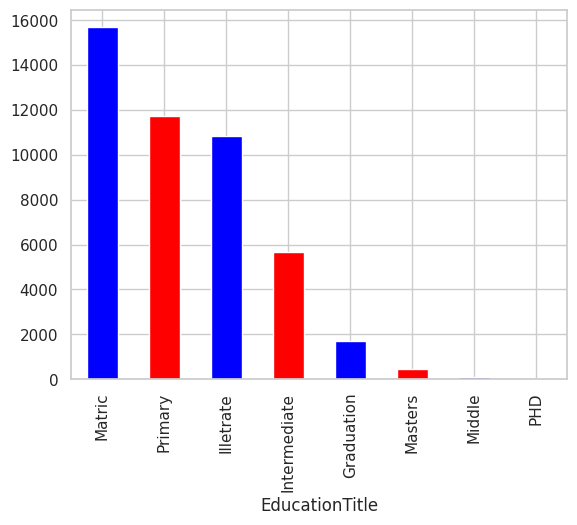

In [ ]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

In [ ]:
encoder=OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  object 
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  object 
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

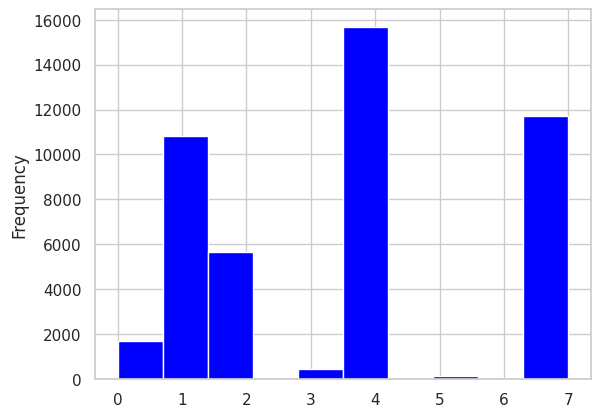

In [ ]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

The histogram shows the distribution of EducationTitle in a dataset. It reveals that most people have education title 5, with fewer people having higher titles and even fewer having lower titles. There are also a few outliers with very high education titles.








\

###EducationTitle Visualization Box plot

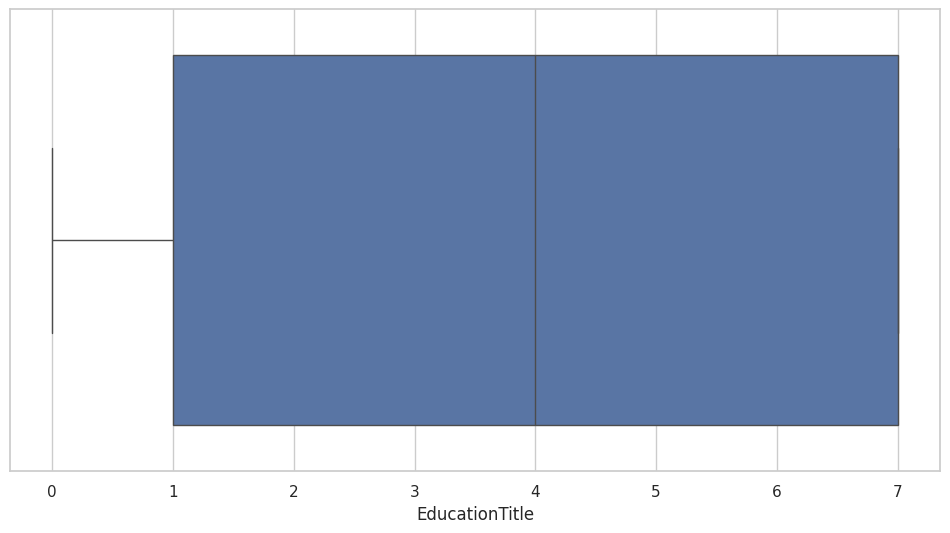

In [ ]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

The median education title is 5, indicating that 50% of the individuals have an education title less than or equal to 5.

The box plot shows a slight right skew, as the whisker on the right side is longer than the whisker on the left side. This indicates that there are a few individuals with higher education titles, but the majority of individuals have lower education titles.


In [ ]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23765
Alive & stable,21811
Dead,584


###Info Patient status Encoding

```
For the columns Patient status, we will apply Ordinal Encoding,
because these features have a strong inherent order
```

###PatientStatus Encoding


In [ ]:
# Define the categories for encoding
PatientStatus = [['Alive & unstable', 'Alive & stable', 'Dead']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=PatientStatus)

# Ensure the column is of type object or string
df['PatientStatus'] = df['PatientStatus']
# Apply the encoder to transform the column
df['PatientStatus'] = encoder.fit_transform(df[['PatientStatus']])

# Check the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  object 
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

In [ ]:
df['PatientStatus'].value_counts()


,count
PatientStatus,
0.0,23765
1.0,21811
2.0,584


<ipython-input-361-862bac0324eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


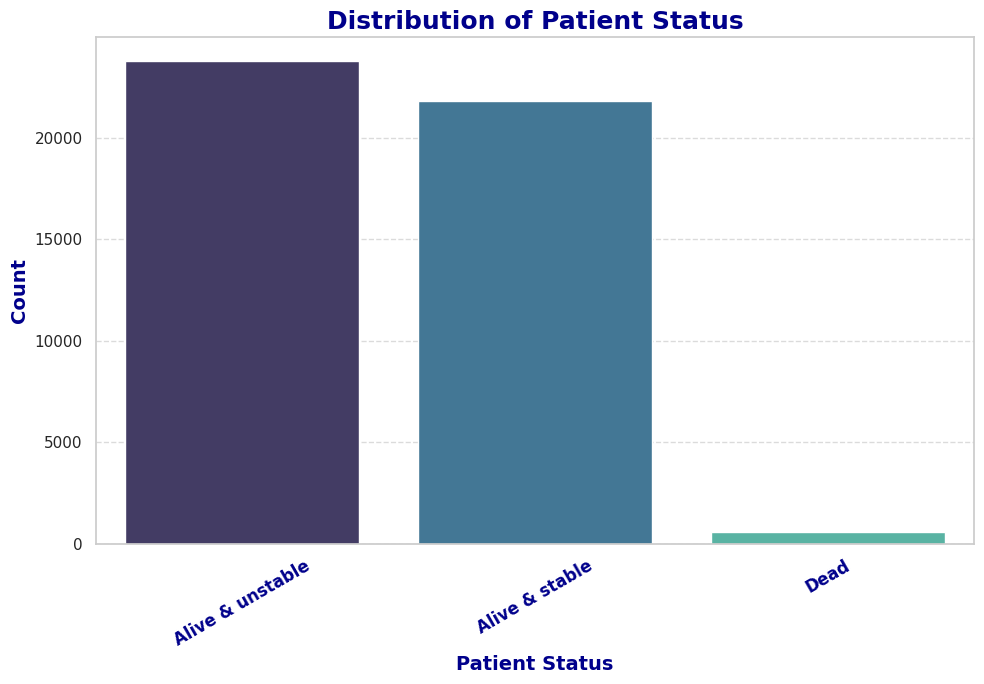

In [ ]:
# Ensure PatientStatus contains integers
encoded_values = df['PatientStatus']

# Map the encoded values back to descriptive labels
PatientStatus_mapping = {0: 'Alive & unstable', 1: 'Alive & stable', 2: 'Dead'}
PatientStatus_mapping_labels = [PatientStatus_mapping[val] for val in encoded_values]

# Prepare the plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("mako", len(PatientStatus_mapping))

# Plot the data using a count plot
sns.countplot(
    x=PatientStatus_mapping_labels,
    order=list(PatientStatus_mapping.values()),  # Ensure correct order
    palette=palette
)

# Add a title and labels with custom fonts
plt.title('Distribution of Patient Status', fontsize=18, weight='bold', color="darkblue")
plt.xlabel('Patient Status', fontsize=14, weight='bold', color="darkblue")
plt.ylabel('Count', fontsize=14, weight='bold', color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold', color="darkblue")

# Add grid lines for better data visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##Target Encoding(Improve)

###InjuryType Encoding

In [ ]:
encoding_map = df.groupby("InjuryType")["PatientStatus"].mean()

# Replace EmergencyArea with the encoded value
df["InjuryType"] = df["InjuryType"].map(encoding_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46160 non-null  object 
 1   TotalPatientsInEmergency  46160 non-null  object 
 2   Gender                    46160 non-null  object 
 3   Age                       46160 non-null  float64
 4   Reason                    46160 non-null  object 
 5   responsetime              46160 non-null  float64
 6   EducationTitle            46160 non-null  float64
 7   InjuryType                46160 non-null  float64
 8   Cause                     46160 non-null  object 
 9   PatientStatus             46160 non-null  float64
 10  BicycleInvovled           46160 non-null  float64
 11  BikesInvolved             46160 non-null  float64
 12  BusesInvolved             46160 non-null  float64
 13  CarsInvolved              46160 non-null  float64
 14  CartInvovle

By replacing each injury type with the mean (or other aggregated statistic) of the corresponding patient status outcomes, the model can leverage this dependency more effectively. This transformation introduces a numerical representation of InjuryType that directly reflects its relationship with PatientStatus, thereby improving the predictive power and reducing noise from irrelevant variations.

In [ ]:
df['InjuryType'].value_counts()

,count
InjuryType,
0.605131,34766
0.096200,6736
0.287797,3499
0.312339,778
0.112861,381


In [ ]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


In [ ]:
df['Reason'].value_counts()

,count
Reason,
same,2318
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1
Unknown van hit the bike (APF-22 US 70cc) and runaway,1


###Fill 'Same' data with forward fill

In [ ]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-366-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


In [ ]:
df['Reason'].value_counts()

,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


In [ ]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29569
Carelessness,14168
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


In [ ]:
df['Cause_Reason'] = df['Cause'] + "_" + df['Reason'] + "_" + df['EmergencyArea']


The Cause feature details accident triggers, while Reason
provides contextual circumstances. To enhance their predictive power, we propose merging them into a single feature
cause_reason.

cause_reason should be combined with EmergencyArea to
identify location-specific accident patterns, further improving
model predictions

In [ ]:
#drop reason and cause column
df.drop(['Reason', 'Cause','EmergencyArea'], axis=1, inplace=True)

In [ ]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
"Carelessness_Tractor over truned due to brake fail_ bahria town phase 07 globe chowk, front of baitul islam rwp",12
"Carelessness_ Toyota Hiace (RIR-1599) ka tyre brust huwa or road k sath drakht mein jaa k laga_ Infront of AL-HARAM CITY Gate, Chakri Road, RWP",9
"Over Speed_ According to victims due to rain slippery road.. collision between 2 bushes ::::Les 5177 and. caf#4242_ near brahama interchange,motorway t/w peshawer",9
Over Speed_Truck hit Hi-Ace _Mandra Tolla Plaza GT Road,9
Over Speed_car hit bike_Shah khalid colony main stop Airport raod rwp.,8
...,...
Over Speed_Car hit the Bike_flying club airport road rwp,1
Over Speed_Collision between Bike and Rickshaw _nadra office attock petrol pump,1
Carelessness_Female cloth stuck in bike chain and Fall from Bike _duble road signal rwp,1


In [ ]:
# encoder = LabelEncoder()
# df['Cause'] = encoder.fit_transform(df['Cause'])
encoding_map = df.groupby("Cause_Reason")["PatientStatus"].mean()

# Replace EmergencyArea with the encoded value
df["Cause_Reason"] = df["Cause_Reason"].map(encoding_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  object 
 1   Gender                    46160 non-null  object 
 2   Age                       46160 non-null  float64
 3   responsetime              46160 non-null  float64
 4   EducationTitle            46160 non-null  float64
 5   InjuryType                46160 non-null  float64
 6   PatientStatus             46160 non-null  float64
 7   BicycleInvovled           46160 non-null  float64
 8   BikesInvolved             46160 non-null  float64
 9   BusesInvolved             46160 non-null  float64
 10  CarsInvolved              46160 non-null  float64
 11  CartInvovled              46160 non-null  float64
 12  RickshawsInvolved         46160 non-null  float64
 13  TractorInvovled           46160 non-null  float64
 14  TrainsInvov

Upon reviewing the dataset, we identified significant improvement opportunities in handling the Cause and
Reason features, which are strongly correlated with the target
variables PatientStatus. So we do cause_reason target encoding with PatientStatus


In [ ]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
0.000000,23365
1.000000,21689
2.000000,494
0.500000,352
0.333333,78
0.666667,78
0.400000,20
0.166667,12
0.750000,12


##One Hot Encoding

###Info Gender Encoding

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



In [ ]:
df['Gender'].value_counts()



,count
Gender,
Male,39770
Female,6389
Other,1


In [ ]:
#print the '0' column whole row from gender
df[df['Gender'] == '0']



,TotalPatientsInEmergency,Gender,Age,responsetime,EducationTitle,InjuryType,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Cause_Reason


As the TotalPatientsInEmergency is not in perfect form same goes for Gender we can just delete this row

In [ ]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == '0'].index, inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,39770
Female,6389
Other,1


###Gender One Hot Encode

In [ ]:
#convert gender into one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  object 
 1   Age                       46160 non-null  float64
 2   responsetime              46160 non-null  float64
 3   EducationTitle            46160 non-null  float64
 4   InjuryType                46160 non-null  float64
 5   PatientStatus             46160 non-null  float64
 6   BicycleInvovled           46160 non-null  float64
 7   BikesInvolved             46160 non-null  float64
 8   BusesInvolved             46160 non-null  float64
 9   CarsInvolved              46160 non-null  float64
 10  CartInvovled              46160 non-null  float64
 11  RickshawsInvolved         46160 non-null  float64
 12  TractorInvovled           46160 non-null  float64
 13  TrainsInvovled            46160 non-null  float64
 14  TrucksInvol

##Convert TotalPatientsInEmergency into numerical

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1119
3,448
4,361
5,185
4,117


In [ ]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46160 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46160 non-null  float64
 1   Age                       46160 non-null  float64
 2   responsetime              46160 non-null  float64
 3   EducationTitle            46160 non-null  float64
 4   InjuryType                46160 non-null  float64
 5   PatientStatus             46160 non-null  float64
 6   BicycleInvovled           46160 non-null  float64
 7   BikesInvolved             46160 non-null  float64
 8   BusesInvolved             46160 non-null  float64
 9   CarsInvolved              46160 non-null  float64
 10  CartInvovled              46160 non-null  float64
 11  RickshawsInvolved         46160 non-null  float64
 12  TractorInvovled           46160 non-null  float64
 13  TrainsInvovled            46160 non-null  float64
 14  TrucksInvol

In [ ]:
import pandas as pd
import numpy as np

df['TotalPatientsInEmergency'] = np.log1p(df['TotalPatientsInEmergency'])

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
0.693147,36151
1.098612,7313
1.386294,1567
1.609438,478
1.791759,255
1.945910,131
2.079442,98
2.197225,55
2.302585,45


#Assignment 2(Phase 2)



##Split Into Train and Test Sets for PatientStatus

In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p2, X_test_PatientStatus_p2, y_train_PatientStatus_p2, y_test_PatientStatus_p2 = train_test_split(X, Y, test_size=0.2, random_state=42)

##Model Train

In [ ]:
model = LogisticRegression(solver='sag',random_state=42)
model.fit(X_train_PatientStatus_p2, y_train_PatientStatus_p2)
y_pred_PatientStatus_p2 = model.predict(X_test_PatientStatus_p2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p2 = accuracy_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2)
precision_PatientStatus_p2 = precision_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted', zero_division=0)
recall_PatientStatus_p2 = recall_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')
f1_PatientStatus_p2 = f1_score(y_test_PatientStatus_p2, y_pred_PatientStatus_p2, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p2:.4f}")
print(f"Precision: {accuracy_PatientStatus_p2:.4f}")
print(f"Recall: {accuracy_PatientStatus_p2:.4f}")
print(f"F1 Score: {accuracy_PatientStatus_p2:.4f}")

Accuracy: 0.9917
Precision: 0.9917
Recall: 0.9917
F1 Score: 0.9917


# Assignment 3(Phase 3)


# For PatientStatus

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_dt, X_test_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt, y_test_PatientStatus_p3_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model train

In [ ]:
# Model train using decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(X_train_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt)
y_pred_PatientStatus_p3_dt = model.predict(X_test_PatientStatus_p3_dt)

##Accuracy, Precision, Recall, F1 Score measure


In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_dt = accuracy_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
precision_PatientStatus_p3_dt = precision_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted', zero_division=0)
recall_PatientStatus_p3_dt = recall_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')
f1_PatientStatus_p3_dt = f1_score(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_dt:.4f}")
print(f"Precision: {precision_PatientStatus_p3_dt:.4f}")
print(f"Recall: {recall_PatientStatus_p3_dt:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_dt:.4f}")

Accuracy: 0.9929
Precision: 0.9928
Recall: 0.9929
F1 Score: 0.9928


##confusion matrix plot

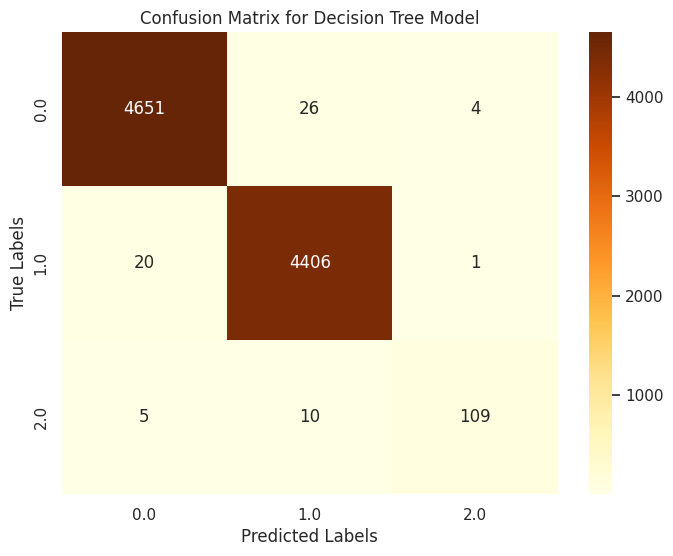

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_dt, y_pred_PatientStatus_p3_dt)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

<ipython-input-389-4e7a4c40d0ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Greens")


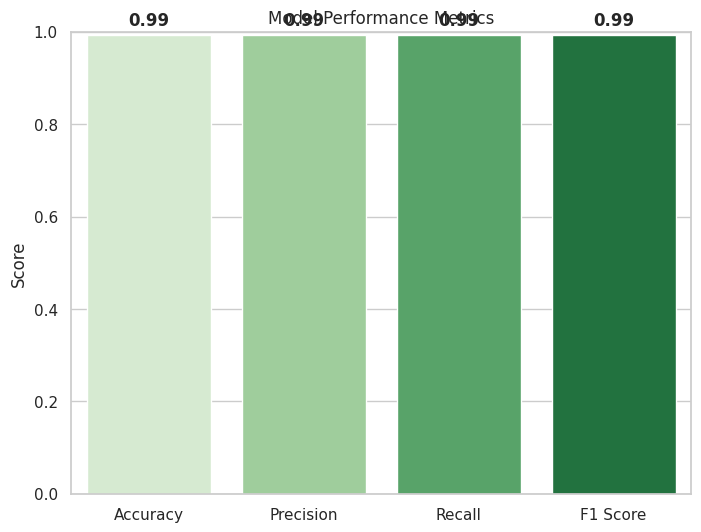

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_dt, precision_PatientStatus_p3_dt, recall_PatientStatus_p3_dt, f1_PatientStatus_p3_dt]

# Plotting the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="Greens")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

##Accuracy (y-axis) VS Max_depth (x-axis)

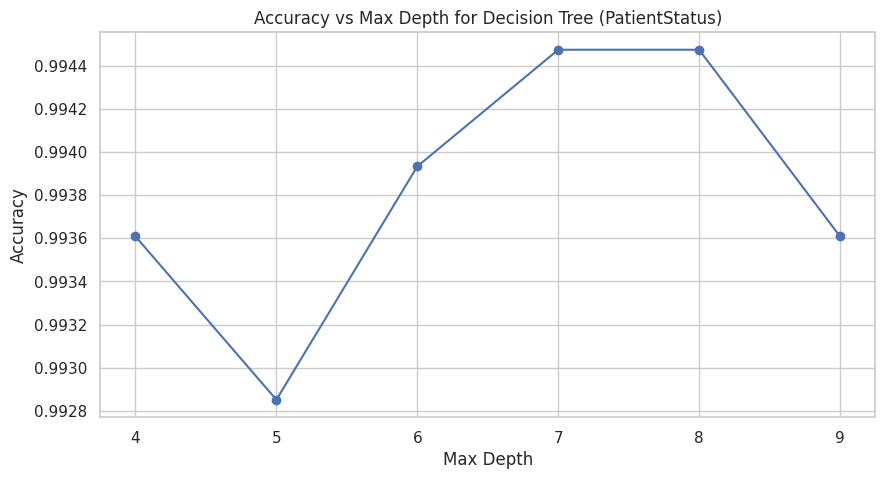

In [ ]:
# Splitting data
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

X_train_PatientStatus_p3_dt, X_test_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt, y_test_PatientStatus_p3_dt = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define max_depth values
max_depths = [4, 5, 6, 7, 8, 9]

# Store results
max_depth_results = []

# Evaluate each max_depth
for max_depth in max_depths:
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train_PatientStatus_p3_dt, y_train_PatientStatus_p3_dt)
    y_pred_dt = model_dt.predict(X_test_PatientStatus_p3_dt)

    # Calculate metrics
    accuracy_dt = accuracy_score(y_test_PatientStatus_p3_dt, y_pred_dt)
    max_depth_results.append((max_depth, accuracy_dt))

# Extract max_depths and accuracies
max_depths = [result[0] for result in max_depth_results]
accuracies = [result[1] for result in max_depth_results]

# Plot Accuracy vs Max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree (PatientStatus)')
plt.grid(True)
plt.show()

#Model Train using SVM

##Split Into Train and Test Sets for PatientStatus


In [ ]:
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']


X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Train

In [ ]:
# model train using svm
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_PatientStatus_p3_svm = model.predict(X_test_PatientStatus_p3_svm)

##Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_svm = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
precision_PatientStatus_p3_svm = precision_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted', zero_division=0)
recall_PatientStatus_p3_svm = recall_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')
f1_PatientStatus_p3_svm = f1_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_svm:.4f}")
print(f"Precision: {precision_PatientStatus_p3_svm:.4f}")
print(f"Recall: {recall_PatientStatus_p3_svm:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_svm:.4f}")

Accuracy: 0.9806
Precision: 0.9676
Recall: 0.9806
F1 Score: 0.9740


##Accuracy, Precision, Recall, F1 Score measure
  

In [ ]:
#accuray , precision recall f1 score measure
accuracy_PatientStatus_p3_svm = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
precision_PatientStatus_p3_svm = precision_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted', zero_division=0)
recall_PatientStatus_p3_svm = recall_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')
f1_PatientStatus_p3_svm = f1_score(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm, average='weighted')

print(f"Accuracy: {accuracy_PatientStatus_p3_svm:.4f}")
print(f"Precision: {precision_PatientStatus_p3_svm:.4f}")
print(f"Recall: {recall_PatientStatus_p3_svm:.4f}")
print(f"F1 Score: {f1_PatientStatus_p3_svm:.4f}")

Accuracy: 0.9806
Precision: 0.9676
Recall: 0.9806
F1 Score: 0.9740


##confusion matrix plot

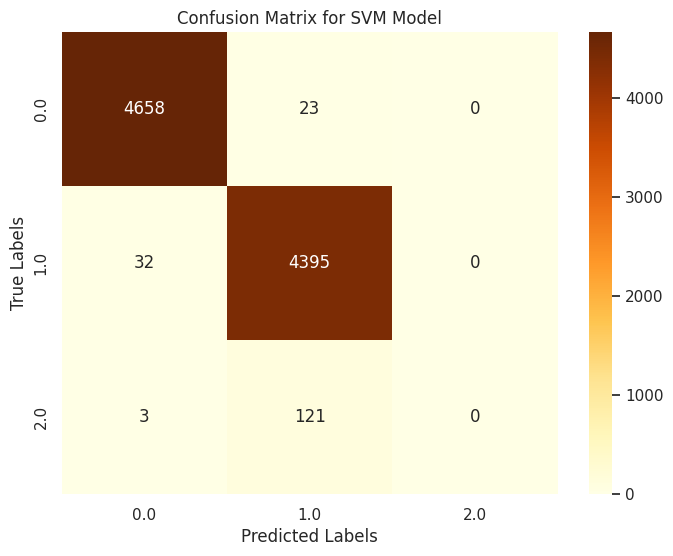

In [ ]:
#confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test_PatientStatus_p3_svm, y_pred_PatientStatus_p3_svm)
labels = model.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()

##Accuracy, Precision, Recall, F1 Score plot

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_PatientStatus_p3_svm, precision_PatientStatus_p3_svm, recall_PatientStatus_p3_svm, f1_PatientStatus_p3_svm]



##Accuracy (y-axis) VS Kernel (x-axis)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)


# Linear Kernel
model_linear = SVC(kernel='linear', random_state=42)
model_linear.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_linear = model_linear.predict(X_test_PatientStatus_p3_svm)
accuracy_linear = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_linear)




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# Poly Kernel
model_poly = SVC(kernel='poly', random_state=42)
model_poly.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_poly = model_poly.predict(X_test_PatientStatus_p3_svm)
accuracy_poly = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_poly)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# RBF Kernel
model_rbf = SVC(kernel='rbf', random_state=42)
model_rbf.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_rbf = model_rbf.predict(X_test_PatientStatus_p3_svm)
accuracy_rbf = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_rbf)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Define features and target
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p3_svm, X_test_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm, y_test_PatientStatus_p3_svm = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_PatientStatus_p3_svm = scaler.fit_transform(X_train_PatientStatus_p3_svm)
X_test_PatientStatus_p3_svm = scaler.transform(X_test_PatientStatus_p3_svm)

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid', random_state=42)
model_sigmoid.fit(X_train_PatientStatus_p3_svm, y_train_PatientStatus_p3_svm)
y_pred_sigmoid = model_sigmoid.predict(X_test_PatientStatus_p3_svm)
accuracy_sigmoid = accuracy_score(y_test_PatientStatus_p3_svm, y_pred_sigmoid)



In [ ]:
# Results and Plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]



<ipython-input-402-2338ad6054e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")


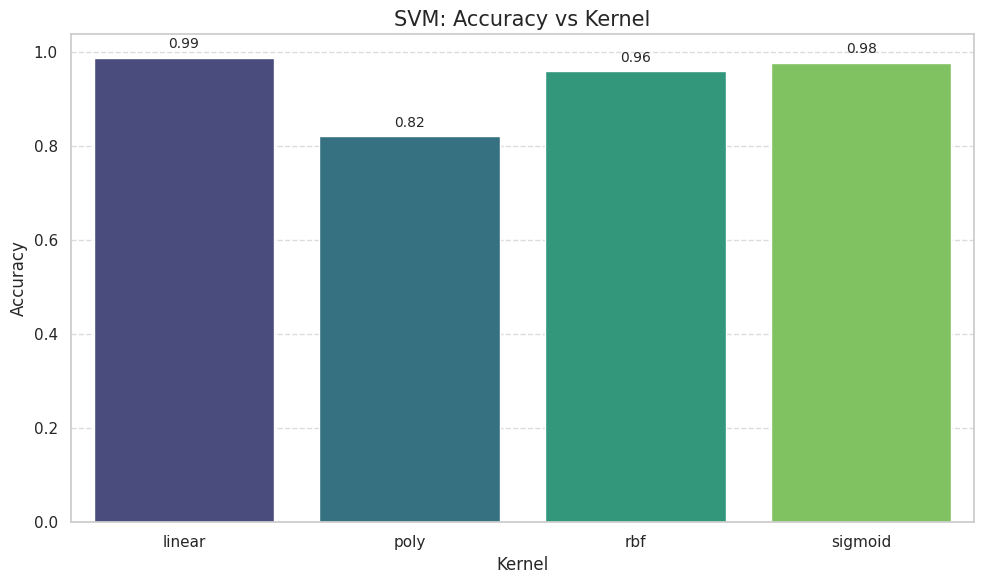

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kernels, y=accuracies, palette="viridis")

# Adding labels and title
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('SVM: Accuracy vs Kernel', fontsize=15)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar plot with accuracy values
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


#Assignment 4 (Phase 4)

In [ ]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
X = df.drop(columns=['PatientStatus'])
Y = df['PatientStatus']

# Perform train-test split (80% train, 20% test)
X_train_PatientStatus_p4, X_test_PatientStatus_p4, y_train_PatientStatus_p4, y_test_PatientStatus_p4 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)




# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train_PatientStatus_p4, y_train_PatientStatus_p4)
    # Predict on test set
    y_pred = model.predict(X_test_PatientStatus_p4)

    # Calculate metrics
    accuracy = accuracy_score(y_test_PatientStatus_p4, y_pred)
    precision = precision_score(y_test_PatientStatus_p4, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_PatientStatus_p4, y_pred, average='weighted')
    f1 = f1_score(y_test_PatientStatus_p4, y_pred, average='weighted')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion_matrix(y_test_PatientStatus_p4, y_pred)
    }

    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

Training Random Forest...
Metrics for Random Forest:
Accuracy: 0.9935
Precision: 0.9935
Recall: 0.9935
F1 Score: 0.9935

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:56:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
Accuracy: 0.9935
Precision: 0.9935
Recall: 0.9935
F1 Score: 0.9935

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Metrics for AdaBoost:
Accuracy: 0.9938
Precision: 0.9939
Recall: 0.9938
F1 Score: 0.9938



##confusion matrix plot

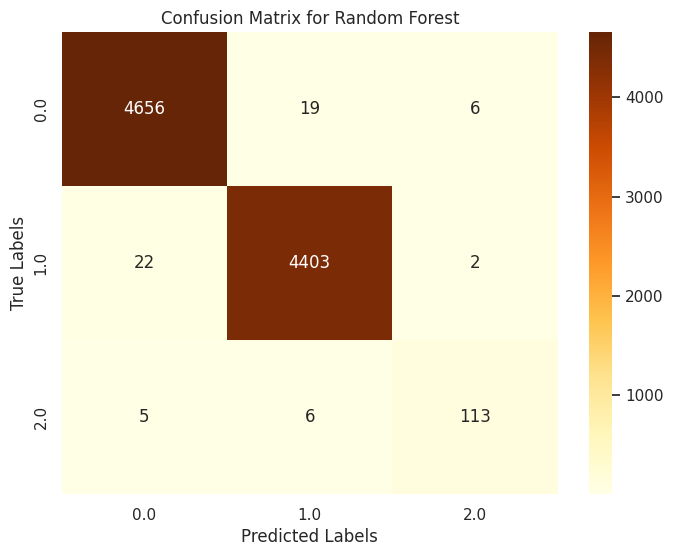

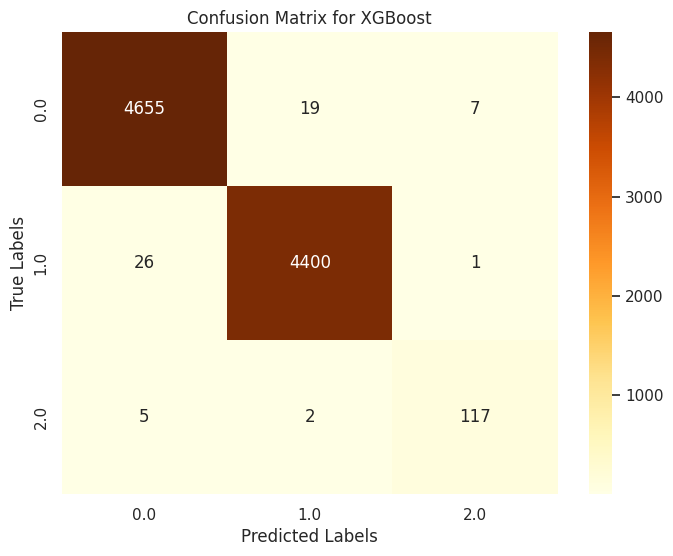

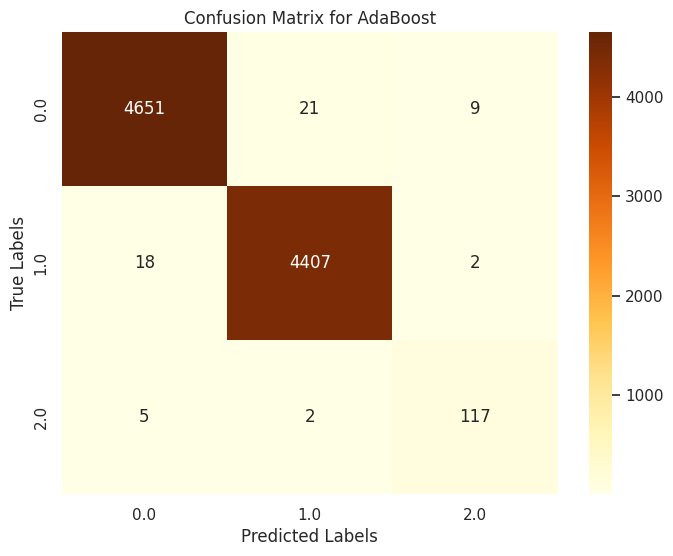

In [ ]:
# Plot Confusion Matrix for each model
for model_name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=models["Random Forest"].classes_,
                yticklabels=models["Random Forest"].classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


##Accuracy, Precision, Recall, F1 Score plot

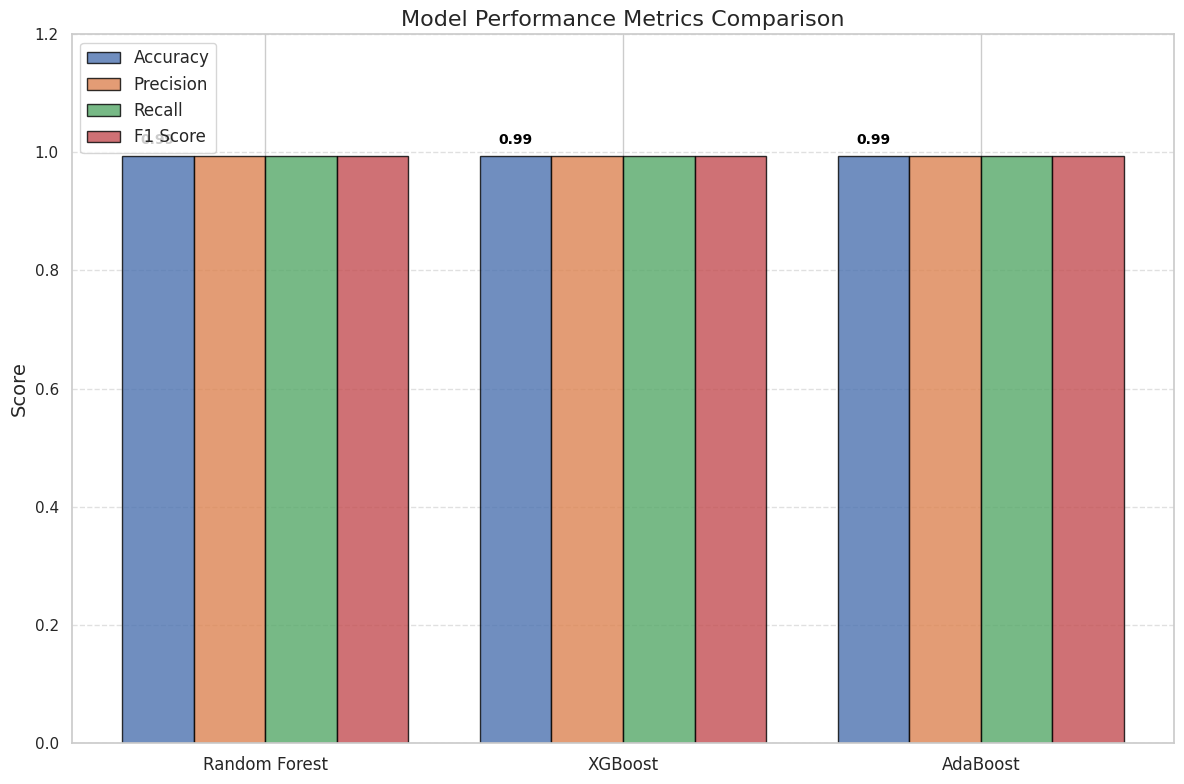

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data for illustration
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

scores = {metric: [results[model_name][metric] for model_name in models.keys()] for metric in metrics}

# Set bar width
bar_width = 0.2
x_positions = np.arange(len(models))

plt.figure(figsize=(12, 8))

# Plot bars for each metric
for idx, metric in enumerate(metrics):
    plt.bar(
        x_positions + idx * bar_width,
        scores[metric],
        width=bar_width,
        label=metric,
        alpha=0.8,
        edgecolor="black"
    )

# Annotate Accuracy values
accuracy_idx = metrics.index('Accuracy')
for idx, acc in enumerate(scores['Accuracy']):
    plt.text(
        x_positions[idx] + accuracy_idx * bar_width,
        acc + 0.02,
        f"{acc:.2f}",
        ha="center",
        color="black",
        fontsize=10,
        weight="bold"
    )

# Beautify the plot
plt.xticks(x_positions + (len(metrics) - 1) * bar_width / 2, models.keys(), fontsize=12)
plt.ylim(0, 1.2)
plt.ylabel("Score", fontsize=14)
plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.legend(fontsize=12, loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


##Comparison for all model for InjuryType

In [ ]:


# Create comparison data for PatientStatus
data_patientstatus = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "SVM",
        "Random Forest",
        "XGBoost",
        "AdaBoost"
    ],
    "Accuracy": [
        accuracy_PatientStatus_p2,
        accuracy_PatientStatus_p3_dt,
        accuracy_PatientStatus_p3_svm,
        results["Random Forest"]["Accuracy"],
        results["XGBoost"]["Accuracy"],
        results["AdaBoost"]["Accuracy"]
    ],
    "Precision": [
        precision_PatientStatus_p2,
        precision_PatientStatus_p3_dt,
        precision_PatientStatus_p3_svm,
        results["Random Forest"]["Precision"],
        results["XGBoost"]["Precision"],
        results["AdaBoost"]["Precision"]
    ],
    "Recall": [
        recall_PatientStatus_p2,
        recall_PatientStatus_p3_dt,
        recall_PatientStatus_p3_svm,
        results["Random Forest"]["Recall"],
        results["XGBoost"]["Recall"],
        results["AdaBoost"]["Recall"]
    ],
    "F1 Score": [
        f1_PatientStatus_p2,
        f1_PatientStatus_p3_dt,
        f1_PatientStatus_p3_svm,
        results["Random Forest"]["F1 Score"],
        results["XGBoost"]["F1 Score"],
        results["AdaBoost"]["F1 Score"]
    ],
}

# Convert data to DataFrames

df_patientstatus = pd.DataFrame(data_patientstatus)

# Function to style the DataFrame
def style_table(df, title):
    styled_df = (
        df.style
        .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Format numeric columns
        .set_table_styles(
            [   # Header style
                {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center")]},
                {"selector": "tbody td", "props": [("text-align", "center")]},  # Center data
            ]
        )
        .set_properties(subset=["Model"], **{"font-weight": "bold", "color": "#2E8B57"})  # Bold Model column
        .background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score"])  # Add gradient
    )
    styled_df = styled_df.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("color", "#333"), ("font-weight", "bold")]}]
    )
    return styled_df

# Display the styled tables

display(style_table(df_patientstatus, "Comparison Table for PatientStatus"))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9917,0.9916,0.9917,0.9915
1,Decision Tree,0.9929,0.9928,0.9929,0.9928
2,SVM,0.9806,0.9676,0.9806,0.9740
3,Random Forest,0.9935,0.9935,0.9935,0.9935
4,XGBoost,0.9935,0.9935,0.9935,0.9935
5,AdaBoost,0.9938,0.9939,0.9938,0.9938
